In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config, visualize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import main
from main import RNNLayer
import ast

%load_ext autoreload
%autoreload 2

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


### Load config

In [2]:
config = load_config("../config.yaml")

In [3]:
def parse_model_info(model_name):
    model_name = model_name.replace('.pth', '')
    model_name = model_name.split('_')
    model_type = model_name[0] + '_' + model_name[1]
    if len(model_name) == 8:    
        activation = model_name[2] + '_' + model_name[3]
        hidden_size = int(model_name[4])
        learning_rate = float(model_name[5])
        batch_size = int(model_name[6])
    else:
        activation = model_name[2]
        hidden_size = int(model_name[3])
        learning_rate = float(model_name[4])
        batch_size = int(model_name[5])
    return model_type, activation, hidden_size, learning_rate, batch_size

parse_model_info('leaky_gru_leaky_relu_128_0.001_128_train.pth')



('leaky_gru', 'leaky_relu', 128, 0.001, 128)

In [4]:
def get_dynamics_model(rnn_type, activation, hidden_size, lr, model, group,device, n_components=3):
    # Load configuration and set hyperparameters
    config = load_config("../config.yaml")
    ruleset = config["rules_analysis"][-1]
    all_rules = config["rules_analysis"]

    hp = {
        "rnn_type": rnn_type,
        "activation": activation,
        "n_rnn": hidden_size,
        "learning_rate": lr,
        "l2_h": 0.00001,
        "l2_weight": 0.00001,
        "mode": "test",
    }
    hp, _, _ = main.set_hyperparameters(
        model_dir="debug", hp=hp, ruleset=all_rules, rule_trains=ruleset
    )
    run_model = main.load_model(
        f"../models/{group}/{model}",
        hp,
        RNNLayer,
        device=device,
    )
    h = main.representation(run_model, all_rules)
    h_trans, explained_variance = main.compute_pca(h, n_components=n_components)
    tensor_on_cpu = h_trans[("AntiPerceptualDecisionMakingDelayResponseT", "stimulus")].cpu()
    return tensor_on_cpu.detach().numpy(), explained_variance

### Get dynamics to plot

In [5]:
model = "leaky_rnn_leaky_relu_256_0.001_128_train.pth"

#### Pretrain unfrozen

In [6]:
group = "pretrain_unfrozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: Th

#### Visualize the curves

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


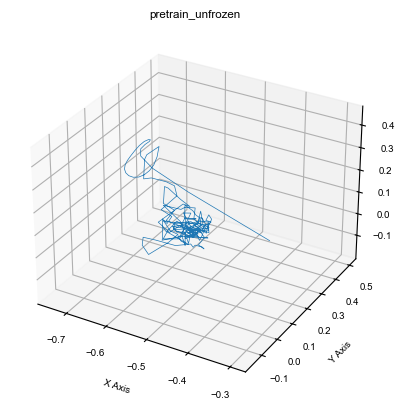

In [7]:
visualize([curve[:,100,:]],title=group)

#### Pretrain frozen

In [8]:
group = "pretrain_frozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.

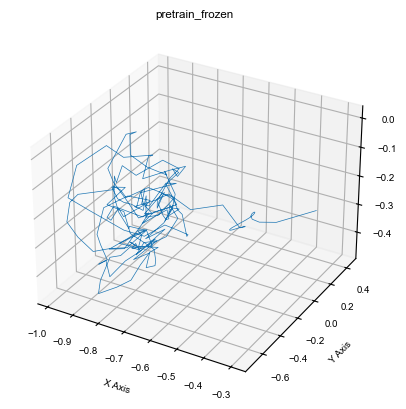

In [9]:
visualize([curve[:,100,:]],title=group)

#### master

In [10]:
group = "master"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.

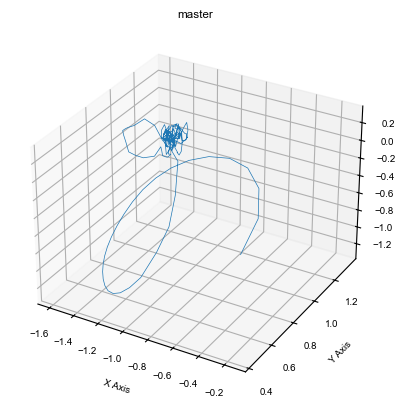

In [11]:
visualize([curve[:,100,:]],title=group)

### Get dissimilarities

#### Computation dynamics

In [12]:
# load data
path = "../data/dissimilarities"
files = os.listdir(path)
data = []
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        data.append(df)
data = pd.concat(data)

# Create a new DataFrame with swapped values
df_swapped = data.rename(columns={"model1": "model2", "model2": "model1", "group1": "group2", "group2": "group1"})

# Concatenate the original DataFrame with the swapped DataFrame
data = pd.concat([data, df_swapped], ignore_index=True)

data_models_averaged = (
    data.groupby(["group1", "group2"])[["cka", "procrustes", "dsa"]]
    .agg(["median", "std"])
    .reset_index()
)

# Flatten the multi-index columns
data_models_averaged.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col
    for col in data_models_averaged.columns
]

# Pivot the data for heatmap
median_df = data_models_averaged.pivot(
    index="group1_",
    columns="group2_",
    values=["cka_median", "procrustes_median", "dsa_median"],
)
std_df = data_models_averaged.pivot(
    index="group1_", columns="group2_", values=["cka_std", "procrustes_std", "dsa_std"]
)

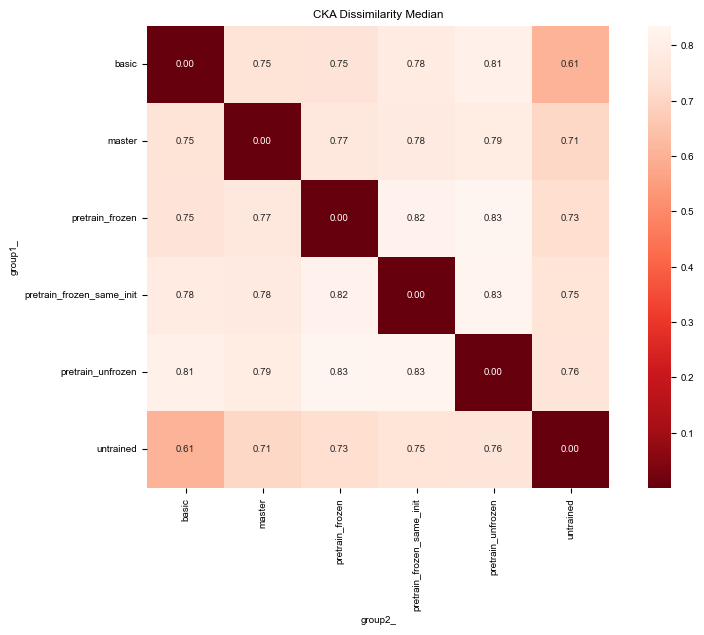

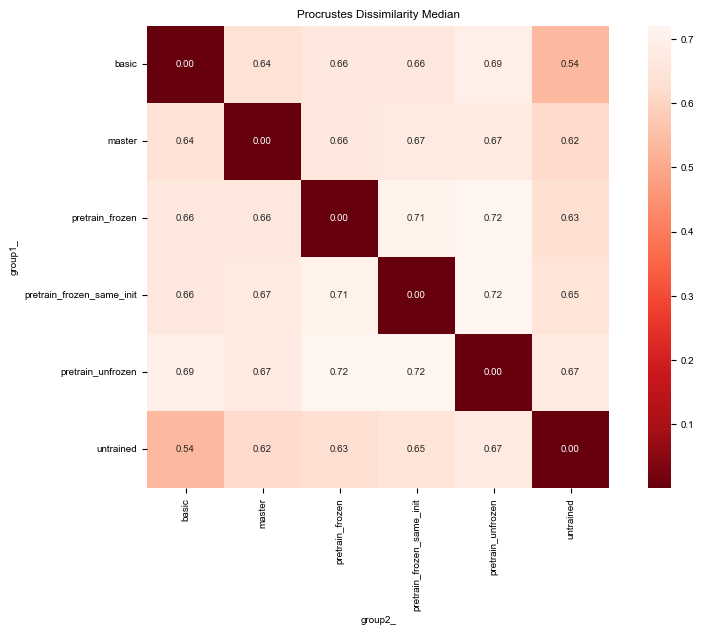

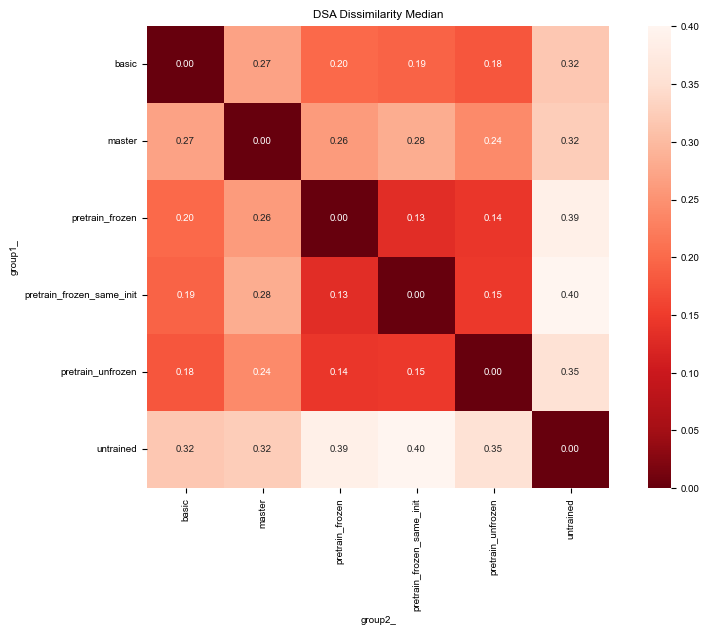

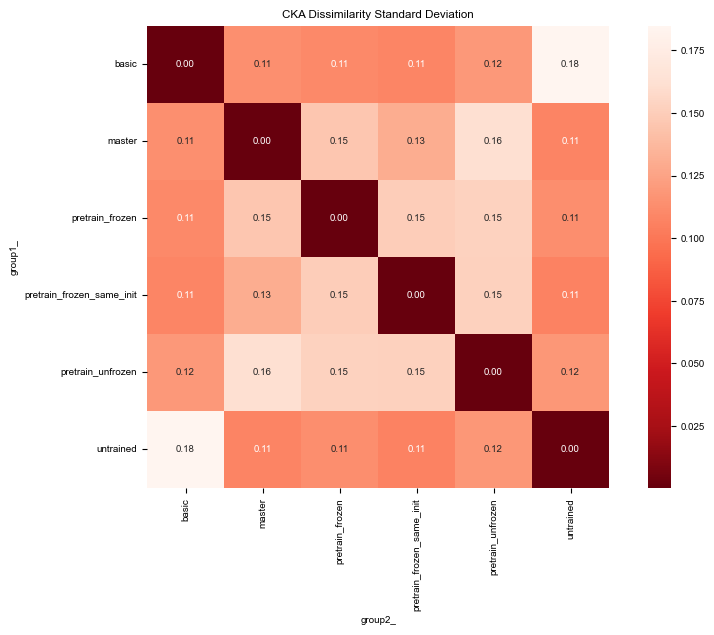

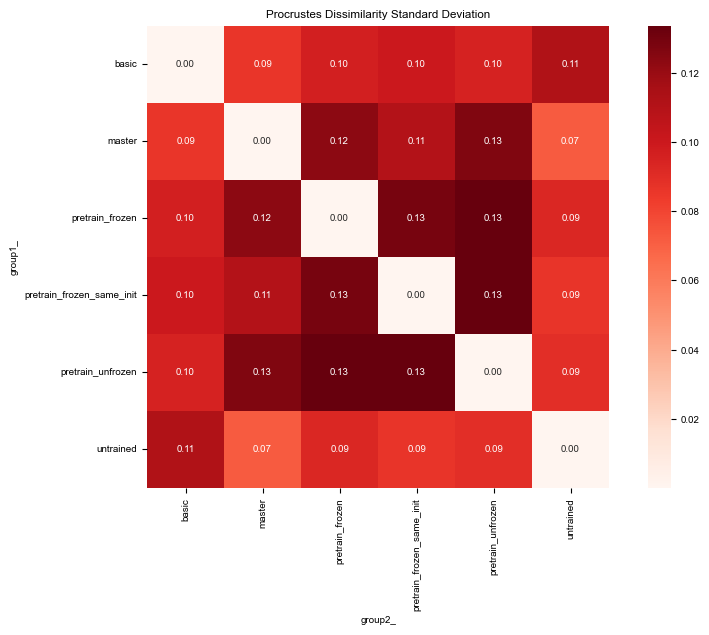

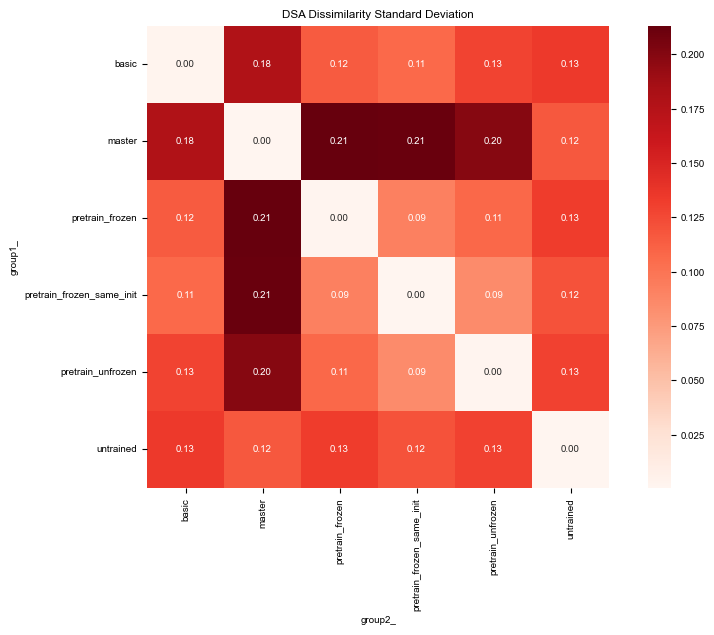

In [13]:
# Function to plot heatmap with a single color
def plot_heatmap(data, title, cmap="Reds_r"):
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        data,
        annot=True,
        cmap=cmap,
        cbar=True,
        square=True,
        fmt=".2f",
    )
    plt.title(title)
    plt.show()


# Plot median heatmaps with single color
plot_heatmap(median_df["cka_median"], "CKA Dissimilarity Median", cmap="Reds_r")
plot_heatmap(
    median_df["procrustes_median"], "Procrustes Dissimilarity Median", cmap="Reds_r"
)
plot_heatmap(median_df["dsa_median"], "DSA Dissimilarity Median", cmap="Reds_r")

# Plot standard deviation heatmaps with single color
plot_heatmap(std_df["cka_std"], "CKA Dissimilarity Standard Deviation", cmap="Reds_r")
plot_heatmap(
    std_df["procrustes_std"],
    "Procrustes Dissimilarity Standard Deviation",
    cmap="Reds",
)
plot_heatmap(
    std_df["dsa_std"],
    "DSA Dissimilarity Standard Deviation",
    cmap="Reds",
)  # Adjust vmin and vmax as needed

#### Learning dynamics

For now, only analysis for pretrain_frozen against pretrain_unfrozen

In [14]:
path = "../data/dissimilarities_over_learning"
files = os.listdir(path)
data = []
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        data.append(df)
df = pd.concat(data)
df['cka'] = df['cka'].apply(ast.literal_eval)
df['procrustes'] = df['procrustes'].apply(ast.literal_eval)
df['dsa'] = df['dsa'].apply(ast.literal_eval)
df['accuracy_1'] = df['accuracy_1'].apply(ast.literal_eval)
# only keep last value of list accuracy 1 for all the rows
df["accuracy_2"] = df["accuracy_2"].apply(ast.literal_eval)
# Create a new DataFrame with swapped values
df_swapped = df.rename(columns={"group1": "group2", "group2": "group1"})

# Concatenate the original DataFrame with the swapped DataFrame
df = pd.concat([df, df_swapped], ignore_index=True)

In [15]:
df["accuracy_1"] = df["accuracy_1"].apply(lambda x: x[-1] if x else [])
df["last_accuracy_1"] = df["accuracy_1"].apply(lambda x: x[-1] if x else np.nan)

In [16]:
df["accuracy_2"] = df["accuracy_2"].apply(lambda x: x[-1] if x else [])
df["last_accuracy_2"] = df["accuracy_2"].apply(lambda x: x[-1] if x else np.nan)

In [17]:
# only keep rows for which the last accuracy is not nan and > 0.8
df = df[(~df["last_accuracy_1"].isna()) & (df["last_accuracy_1"] > 0)]
df = df[(~df["last_accuracy_2"].isna()) & (df["last_accuracy_2"] > 0)]


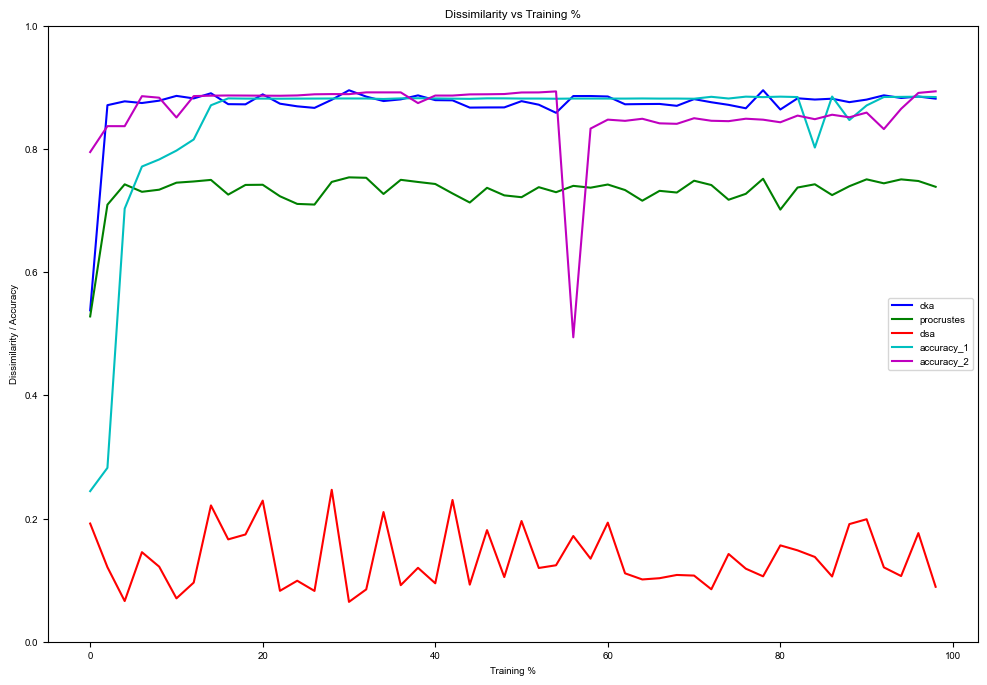

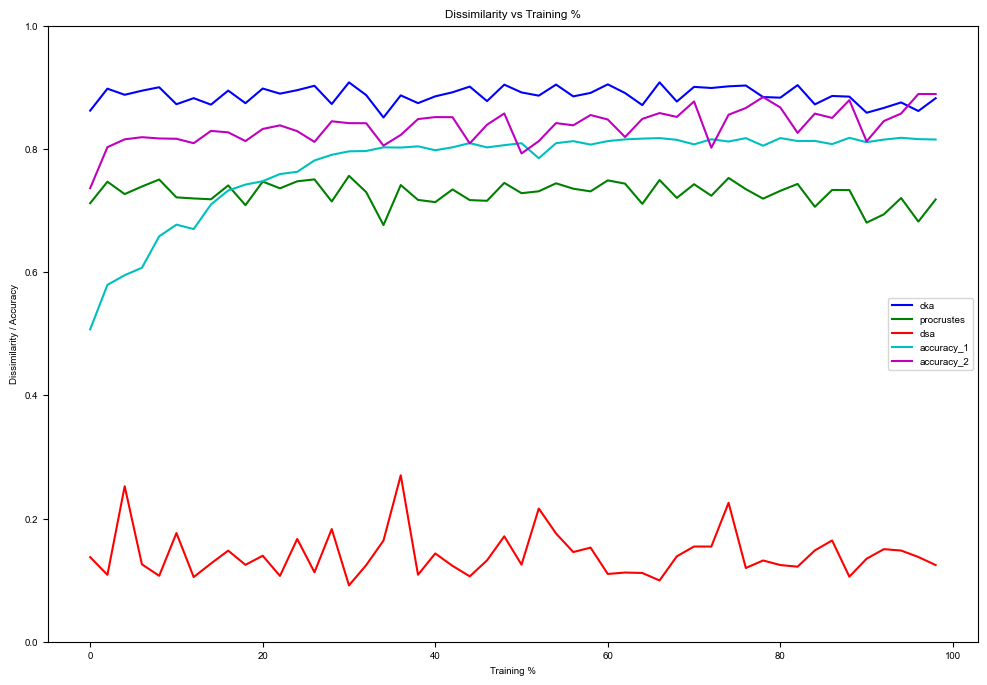

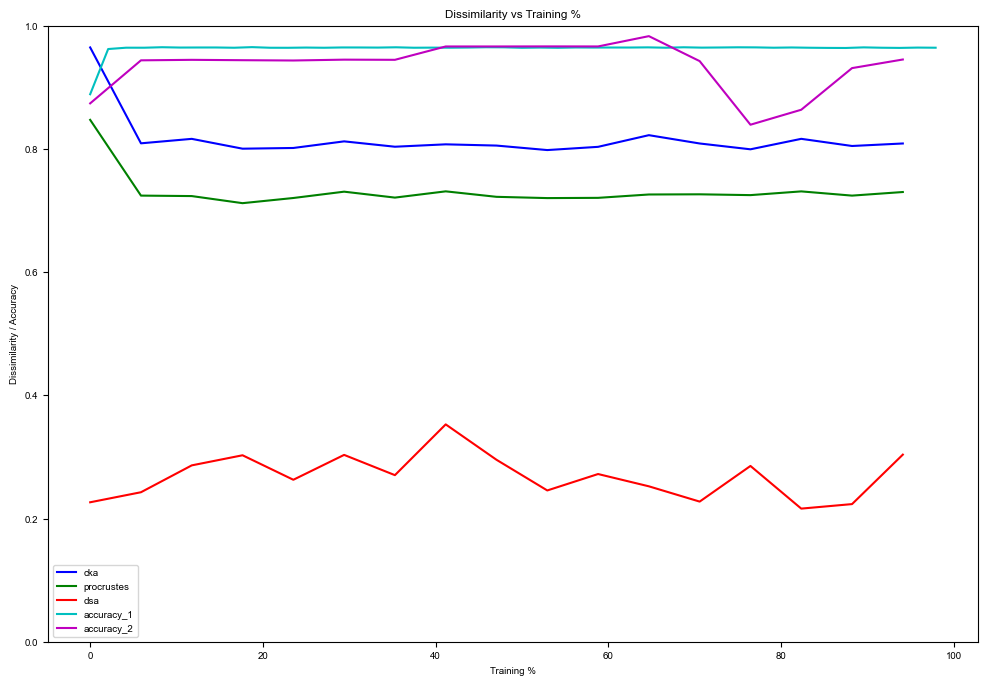

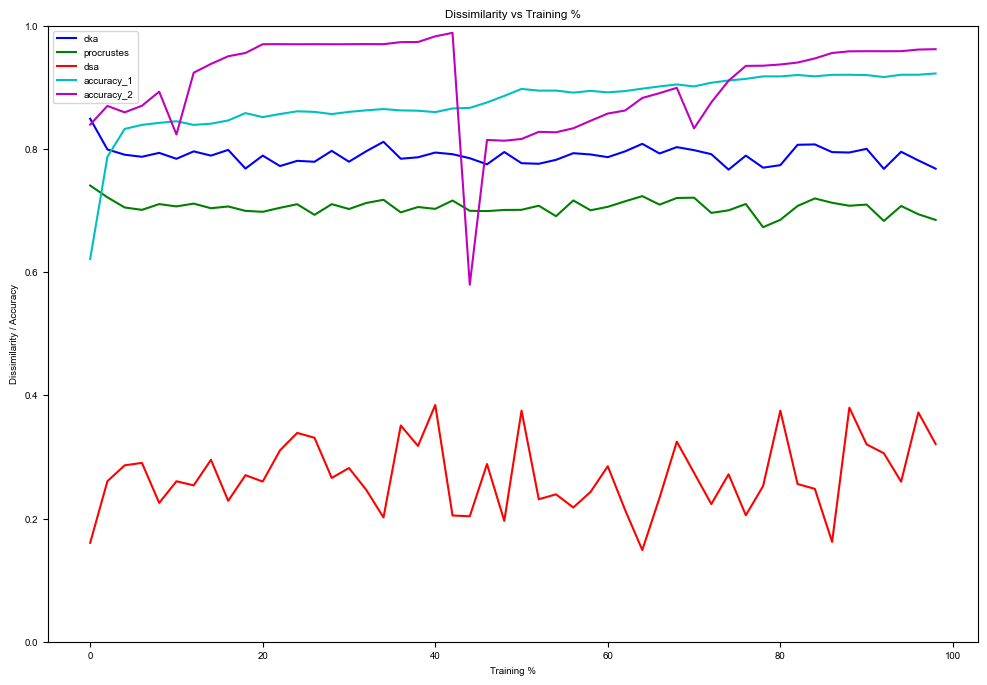

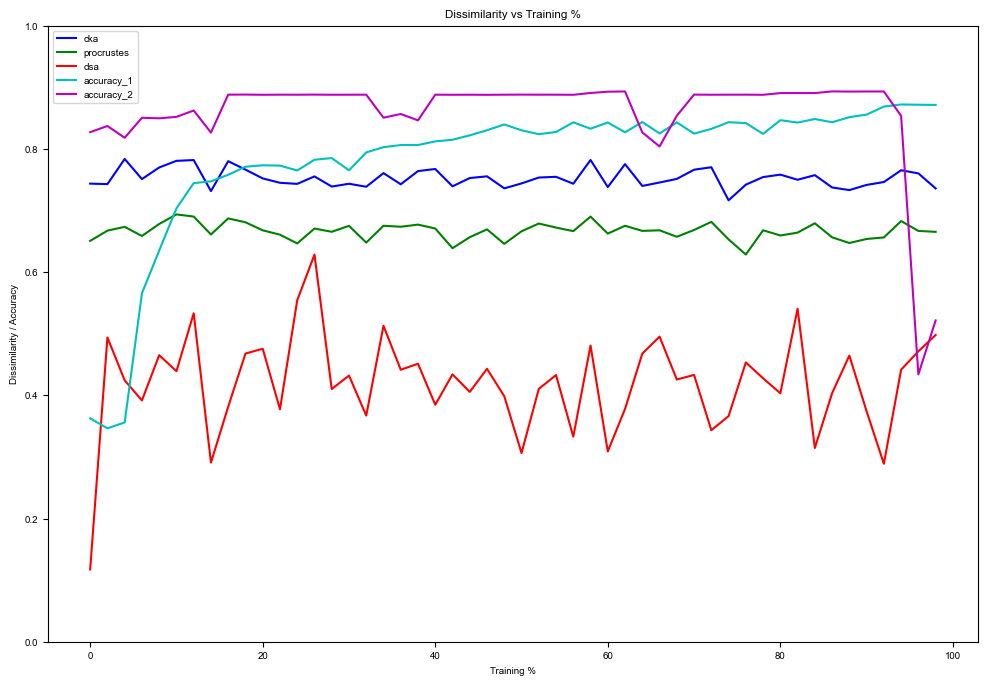

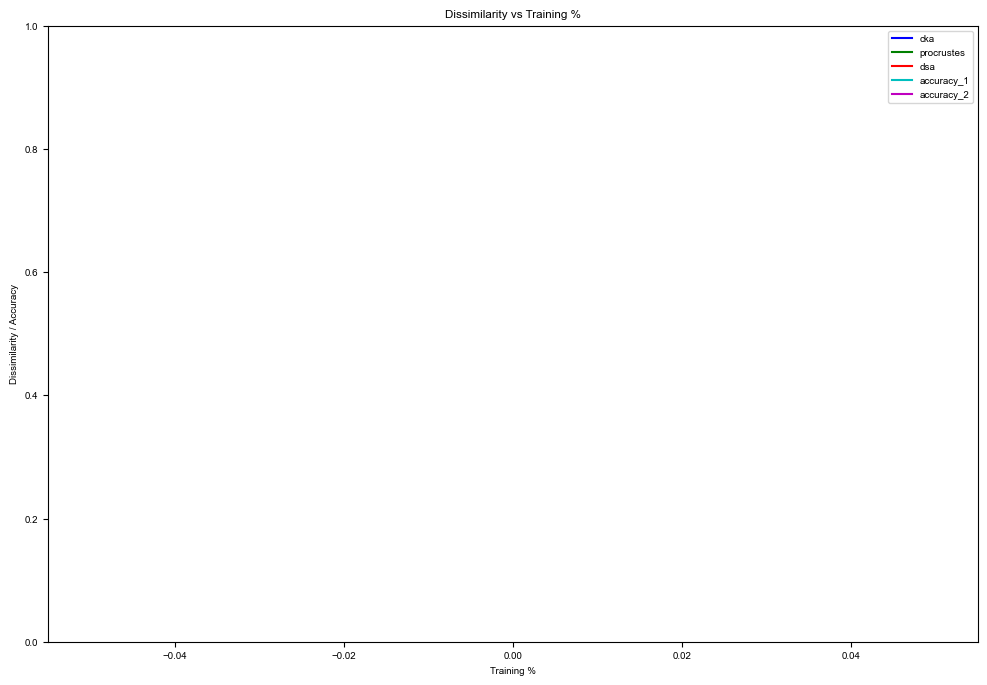

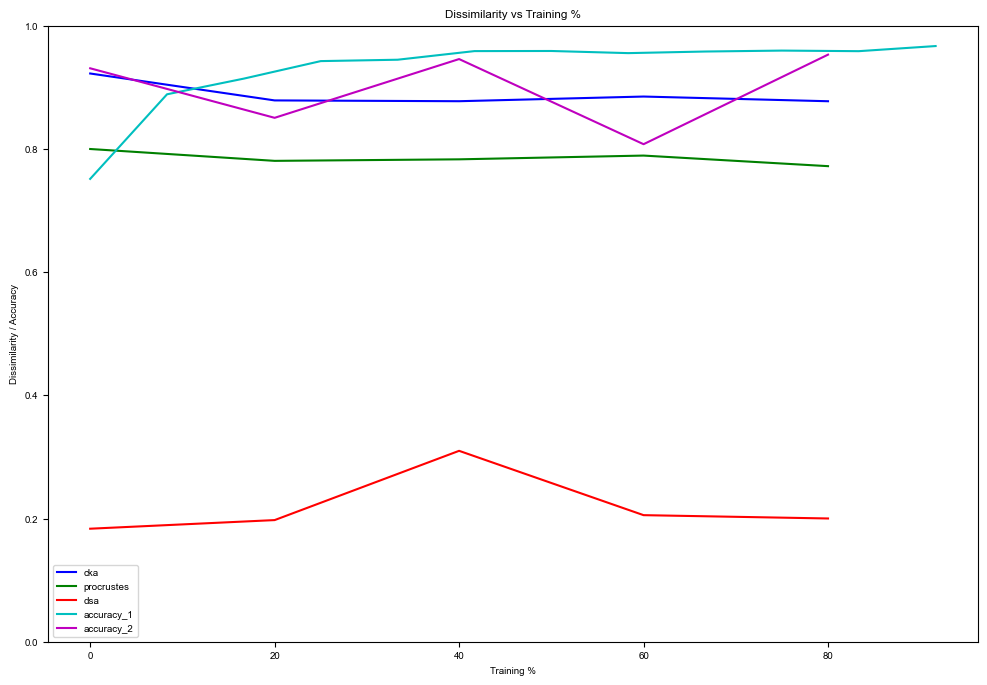

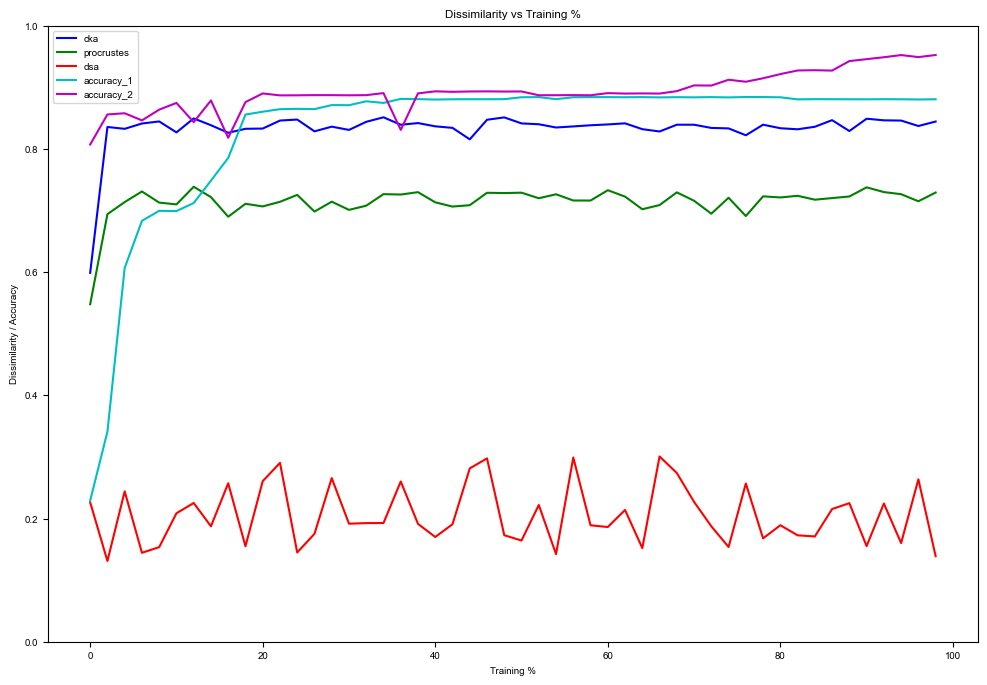

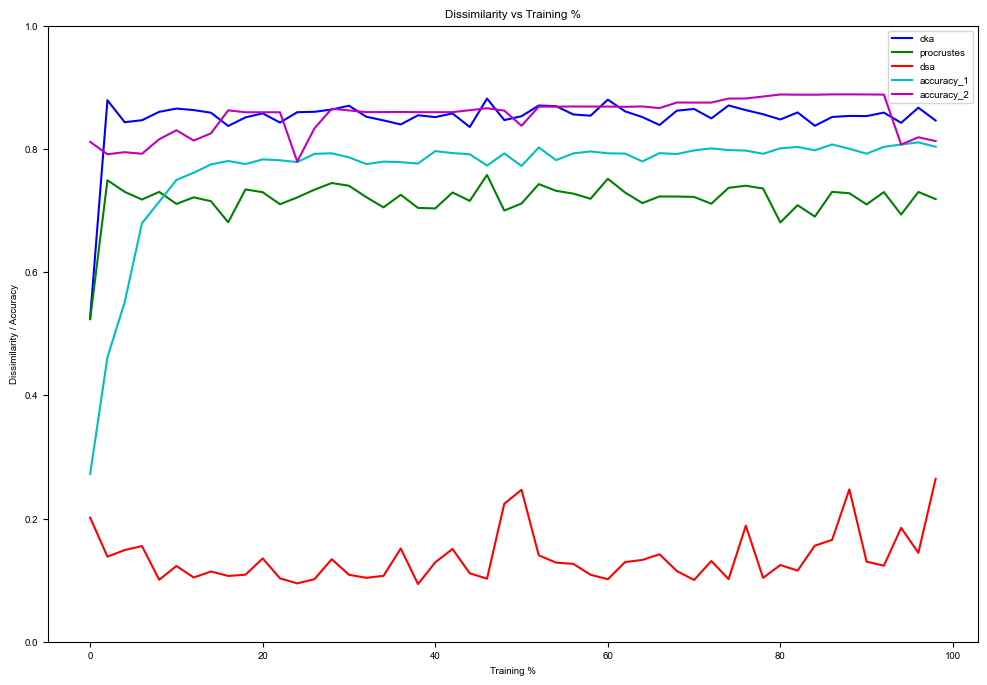

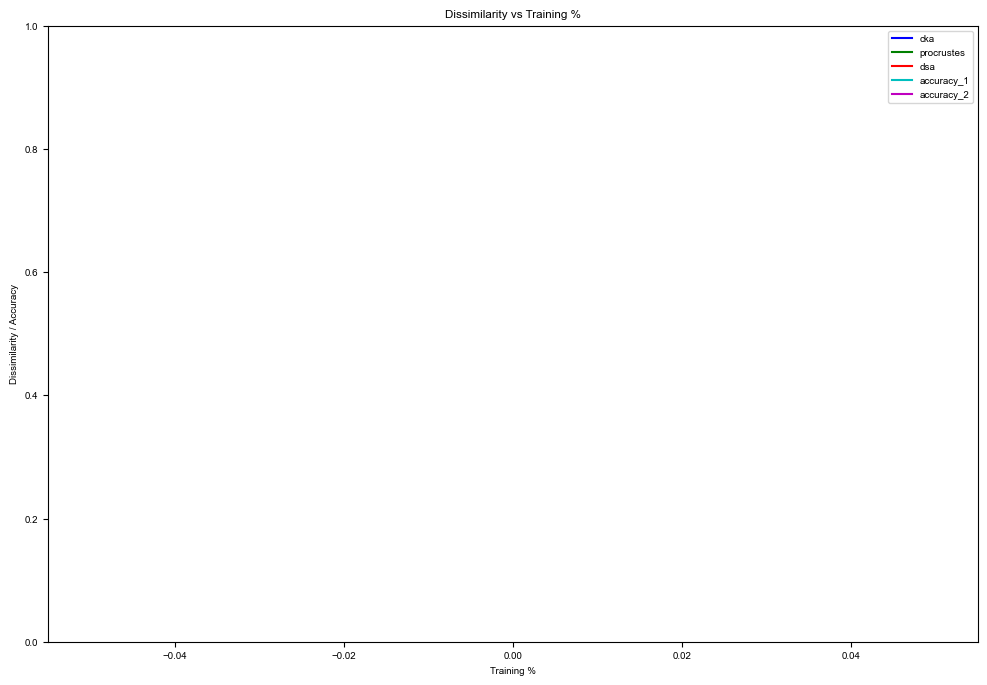

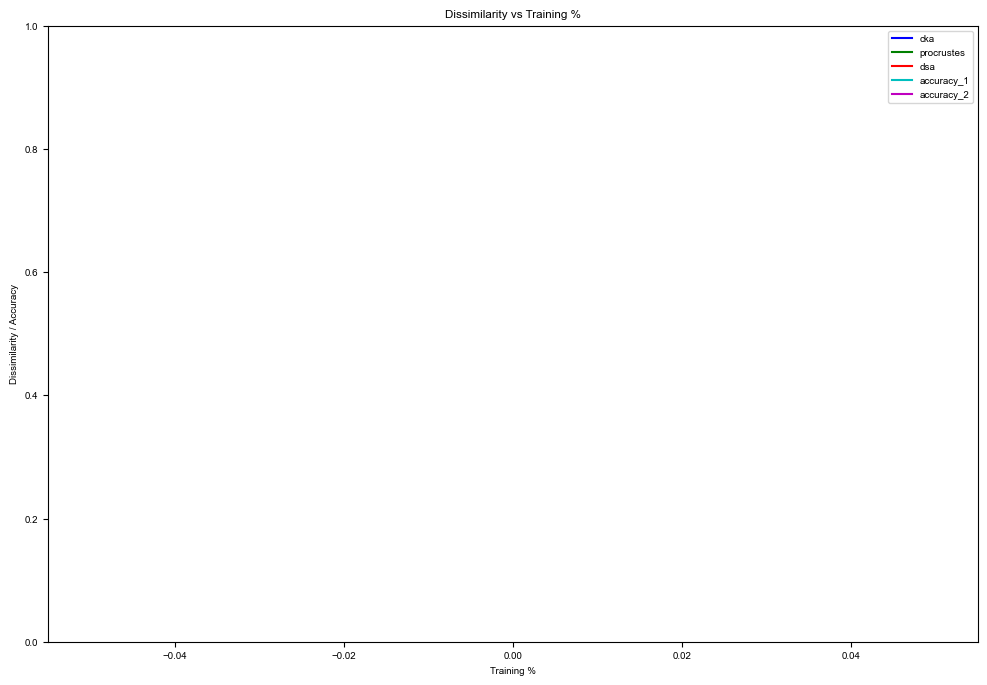

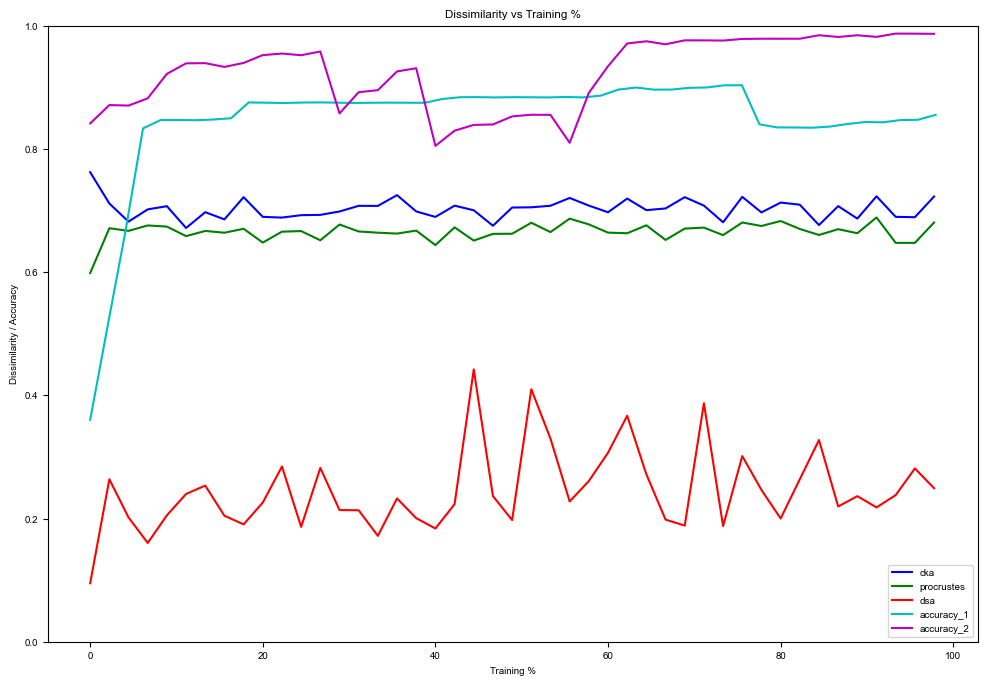

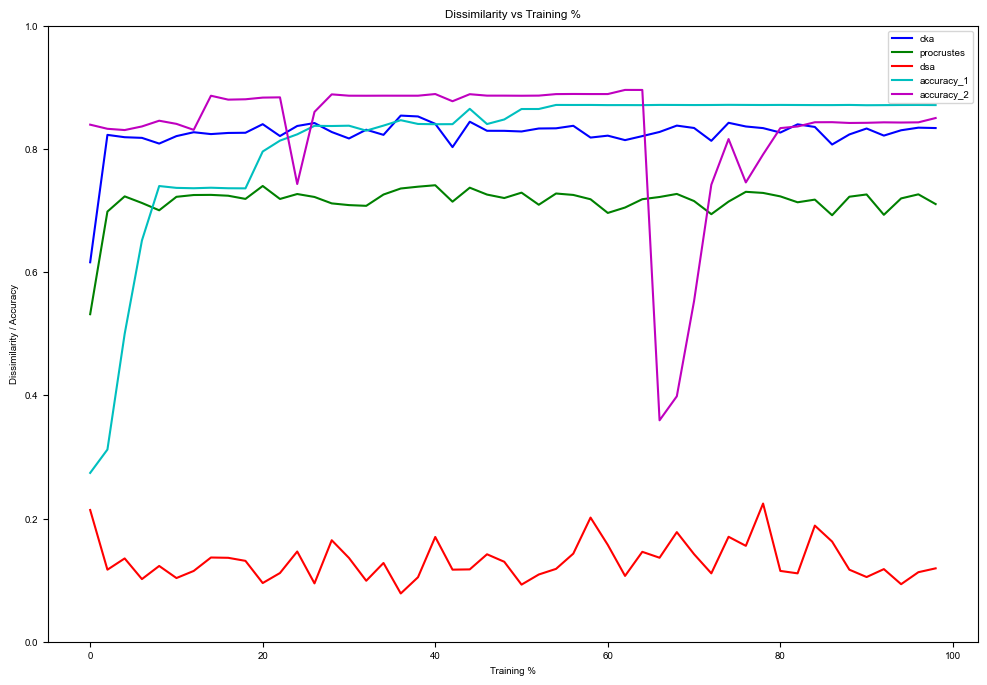

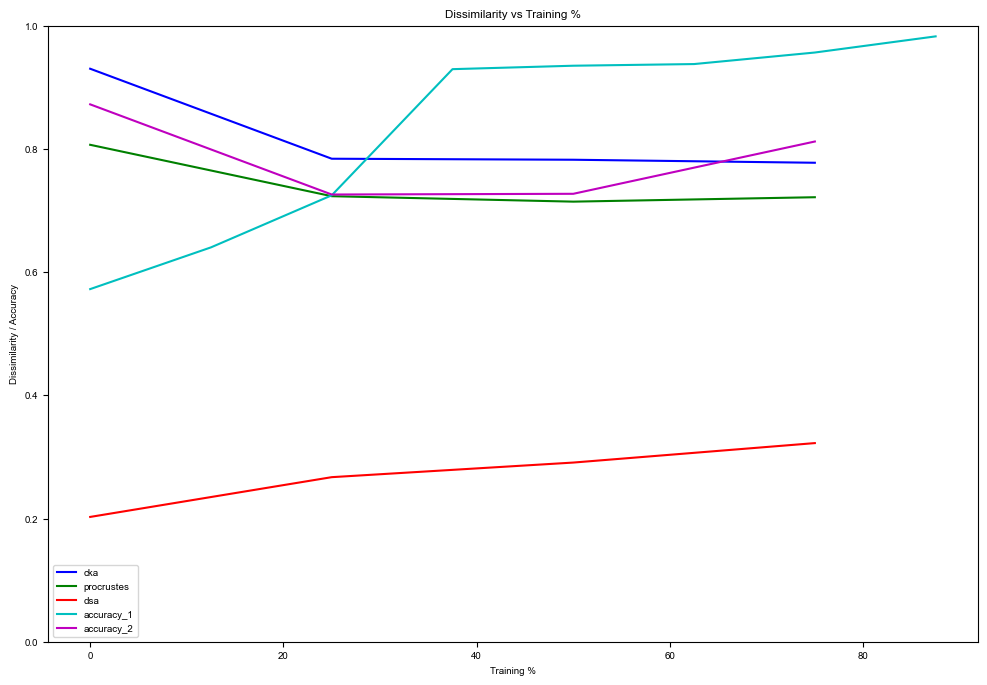

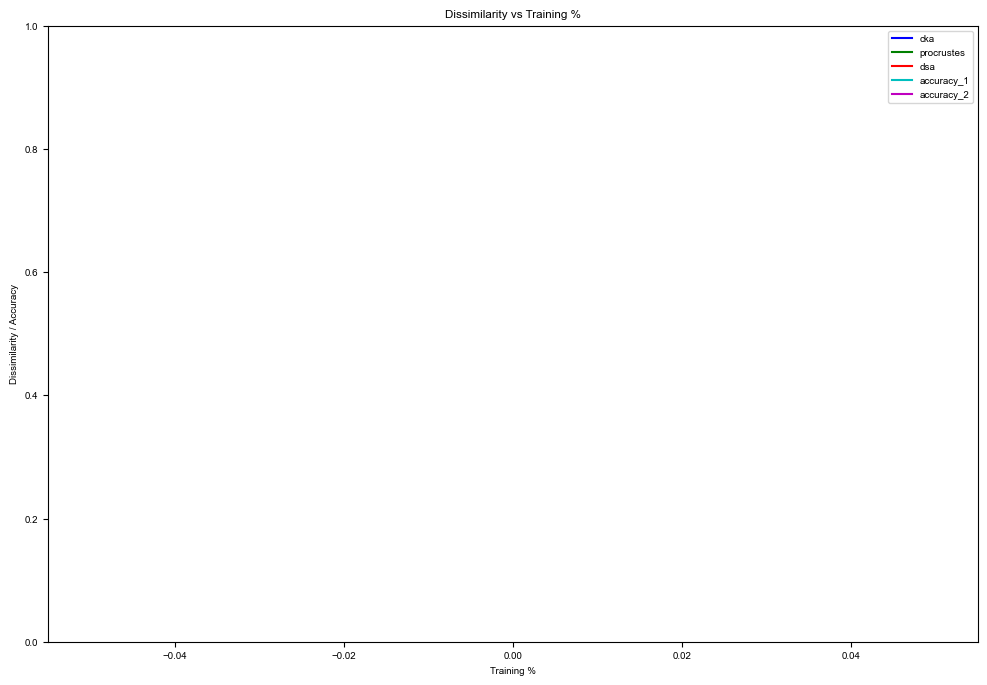

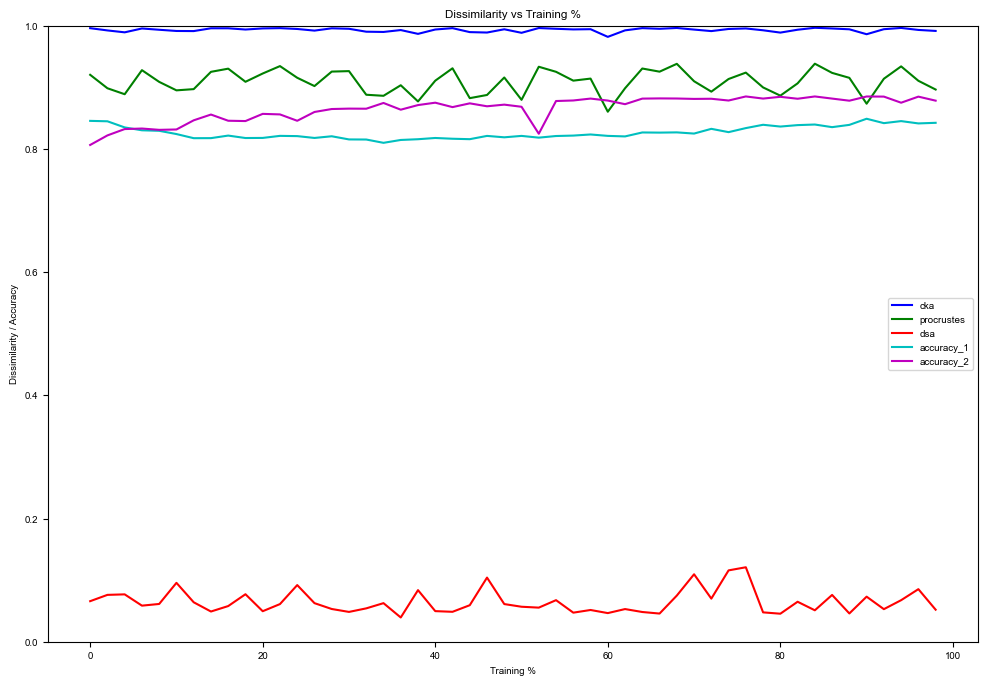

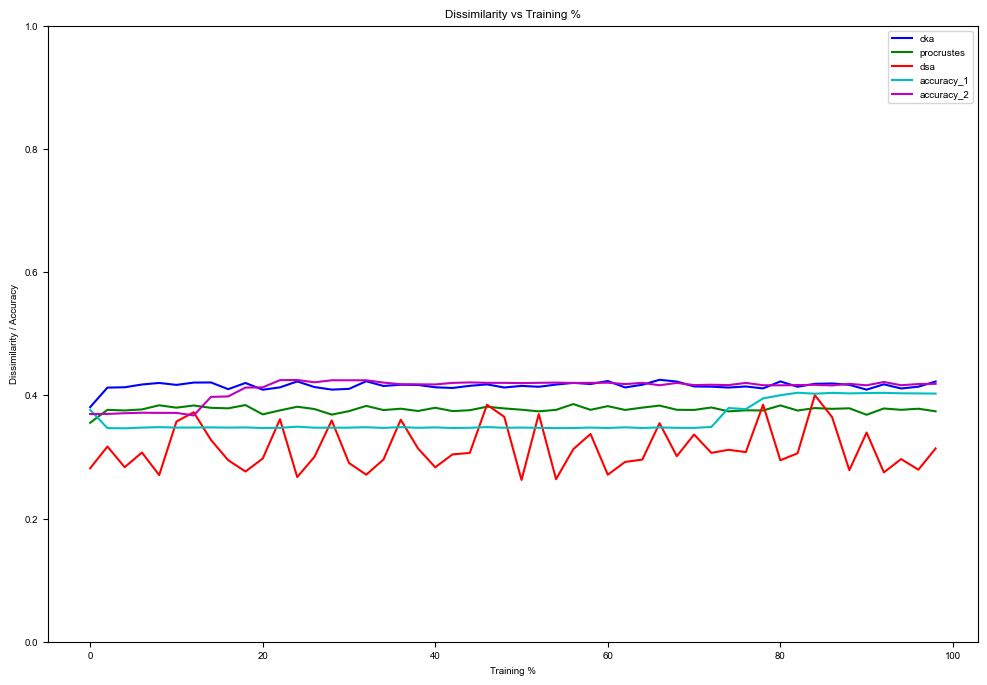

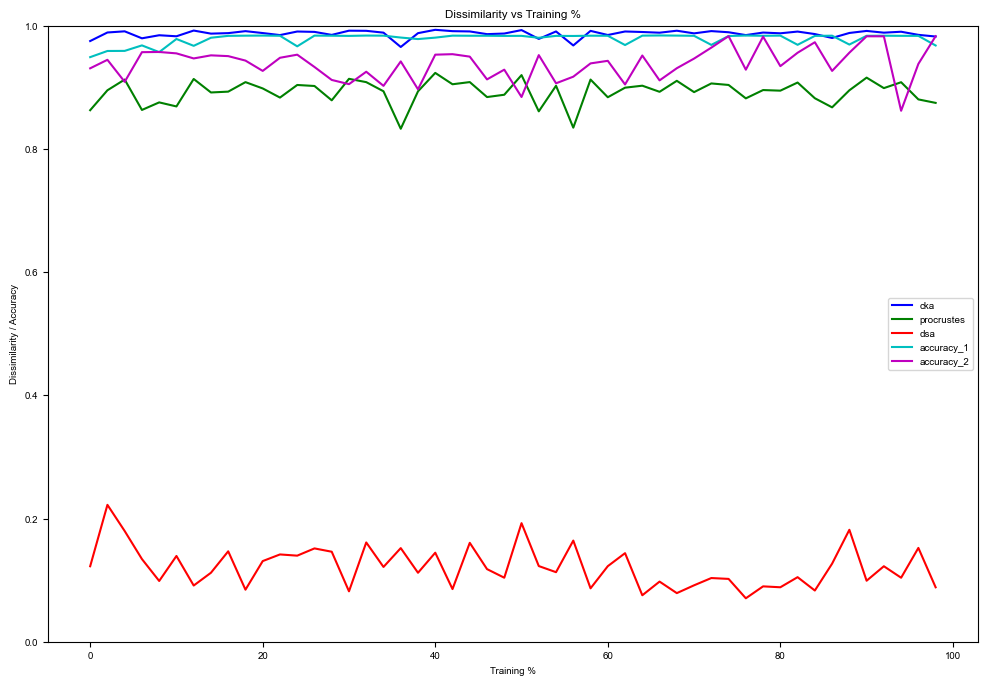

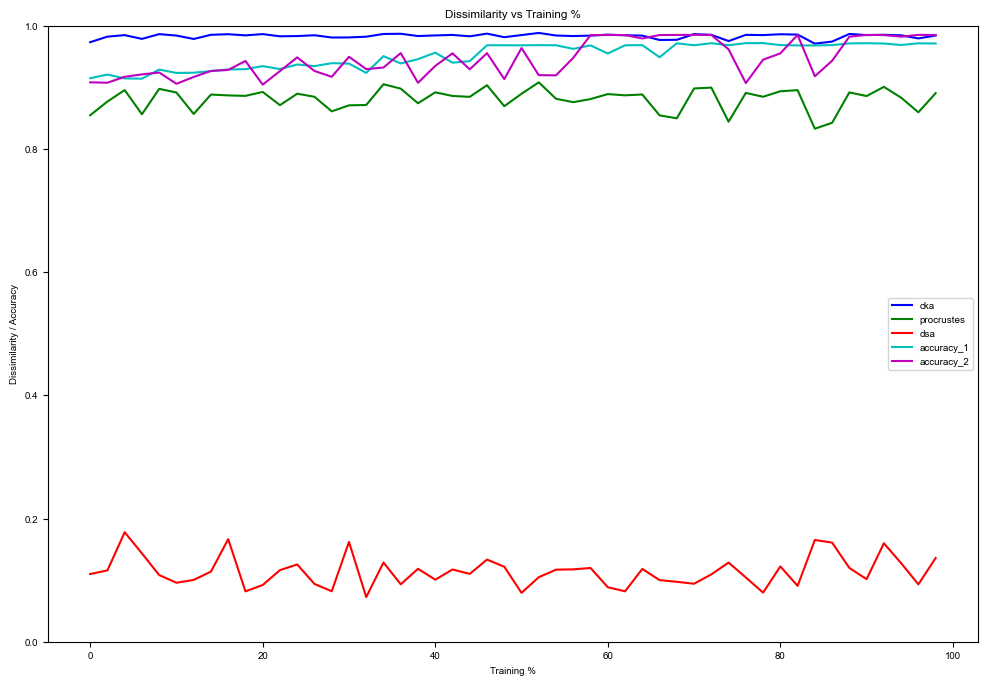

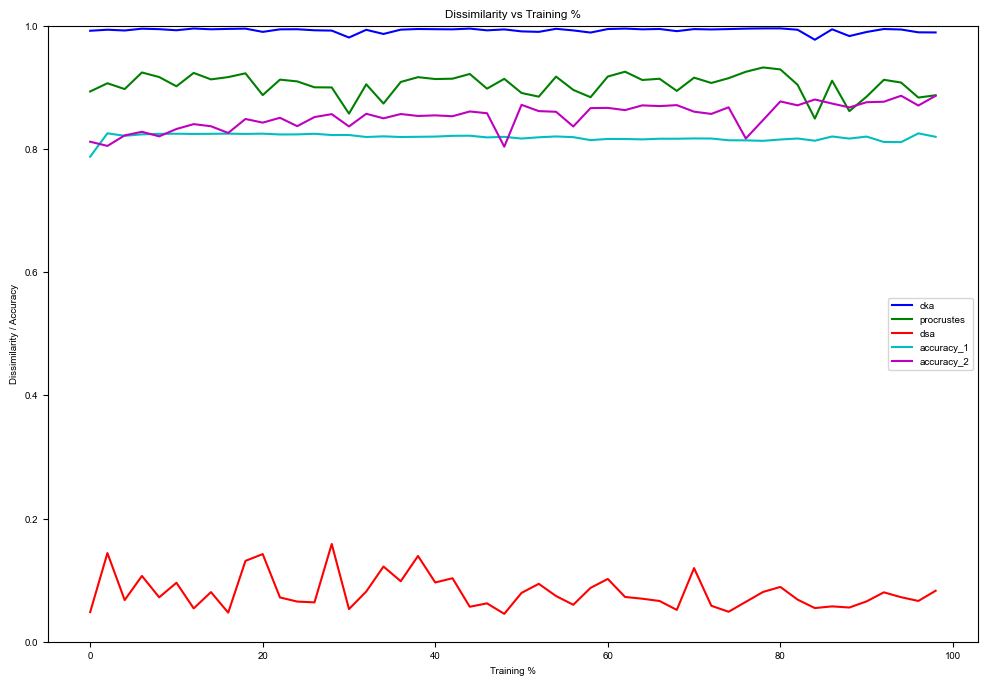

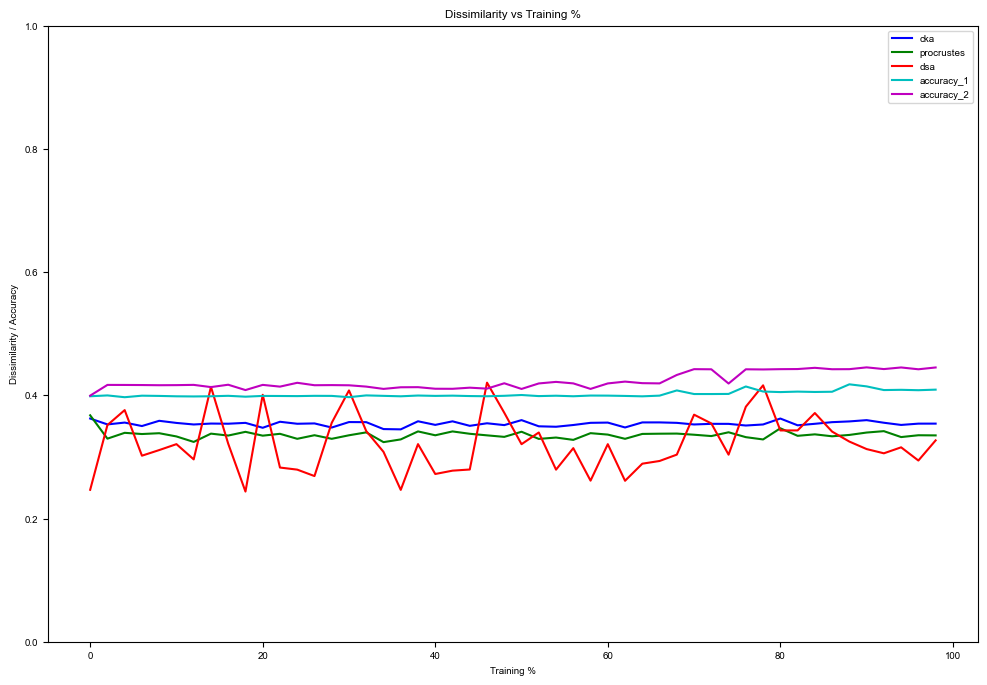

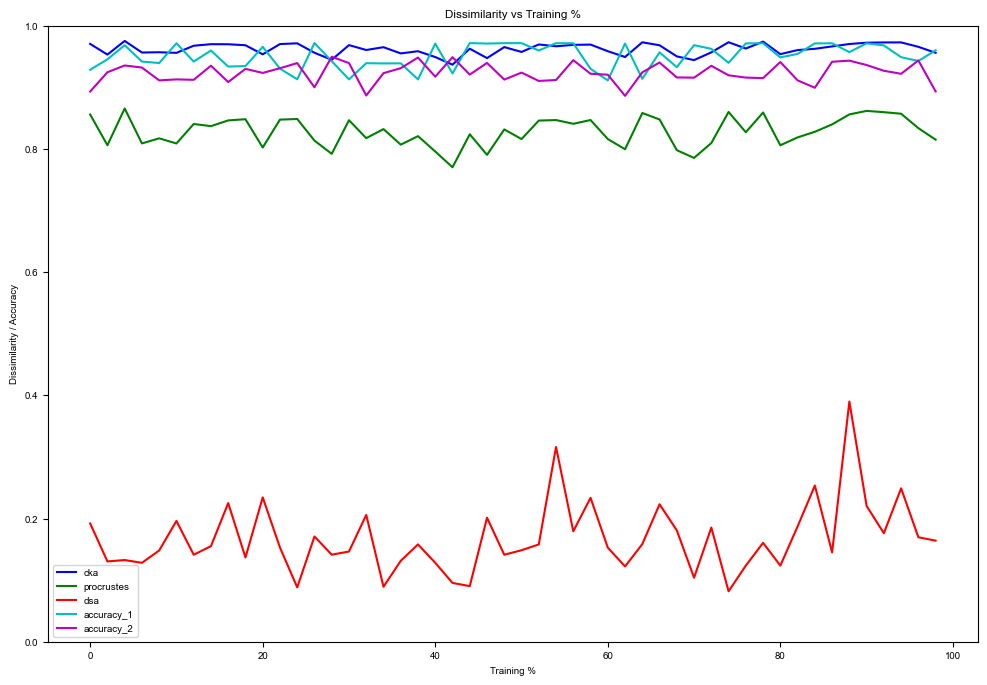

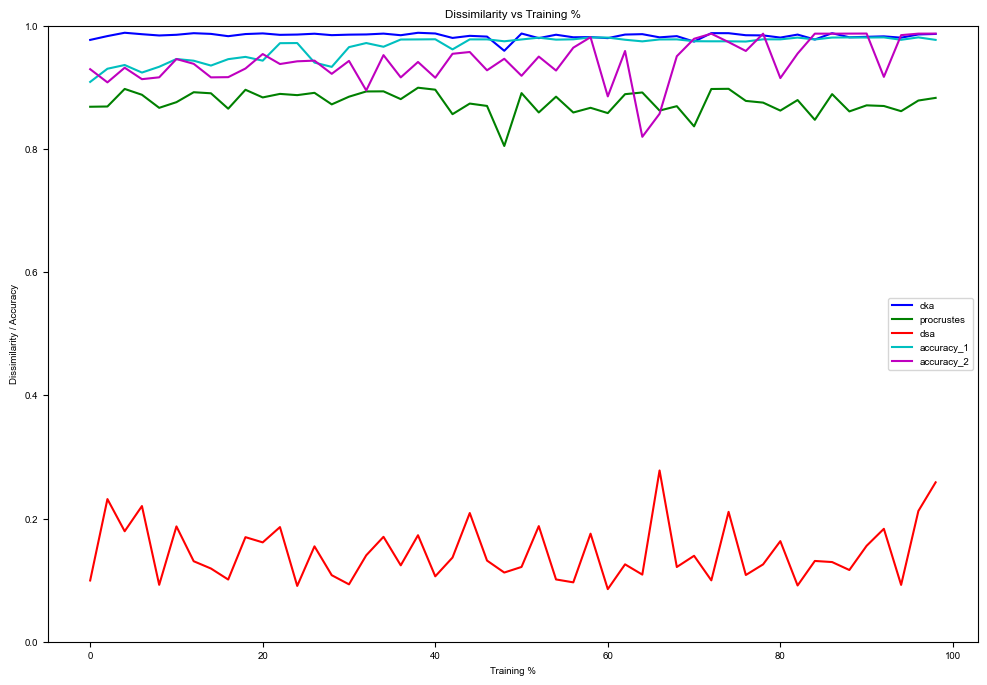

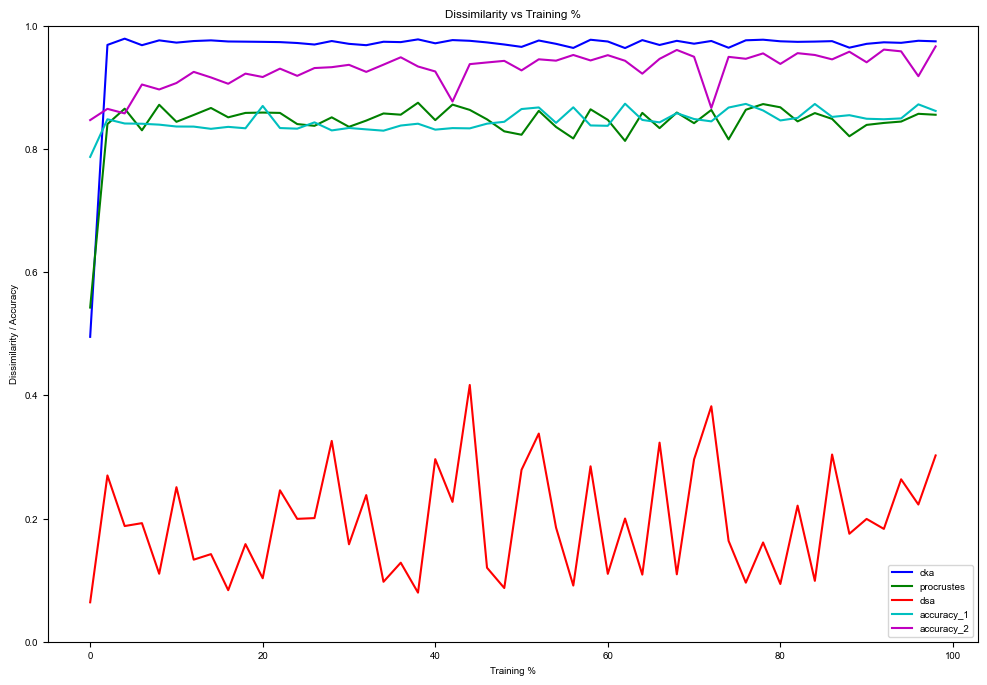

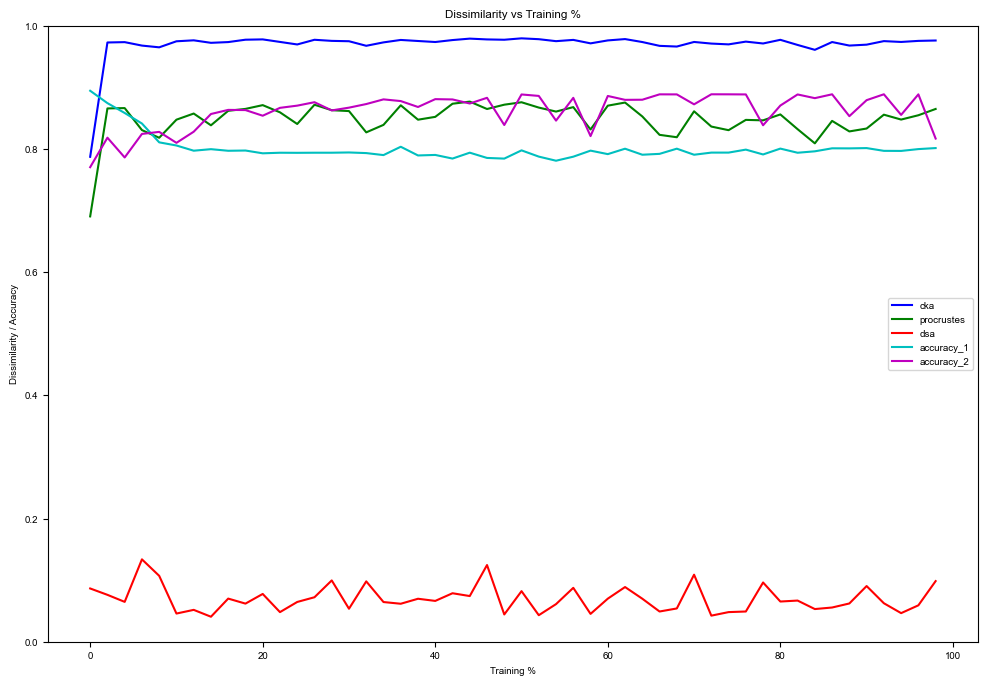

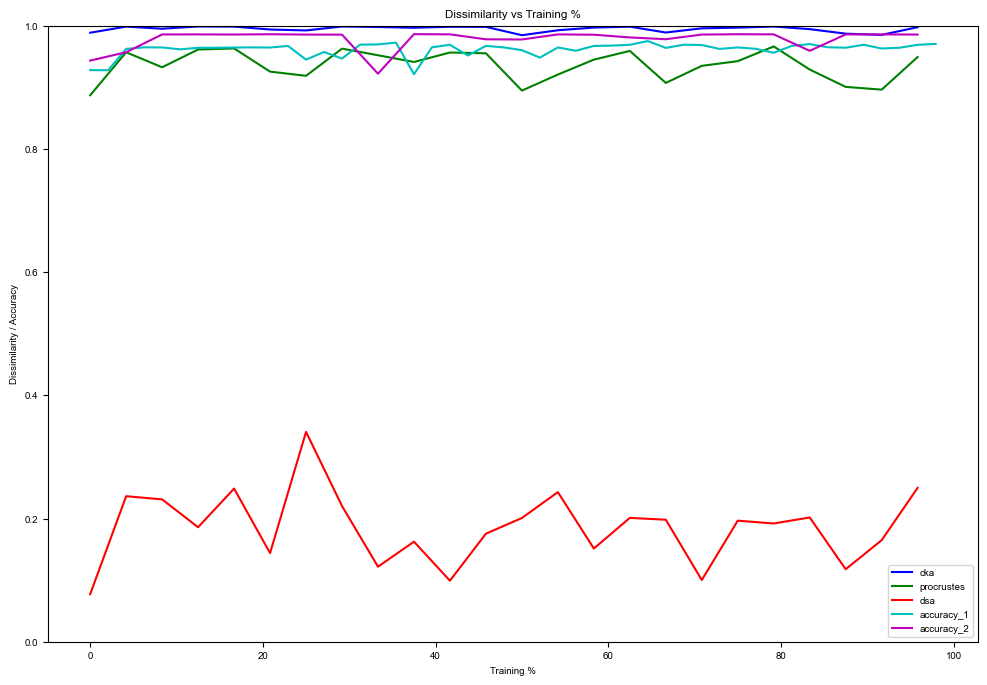

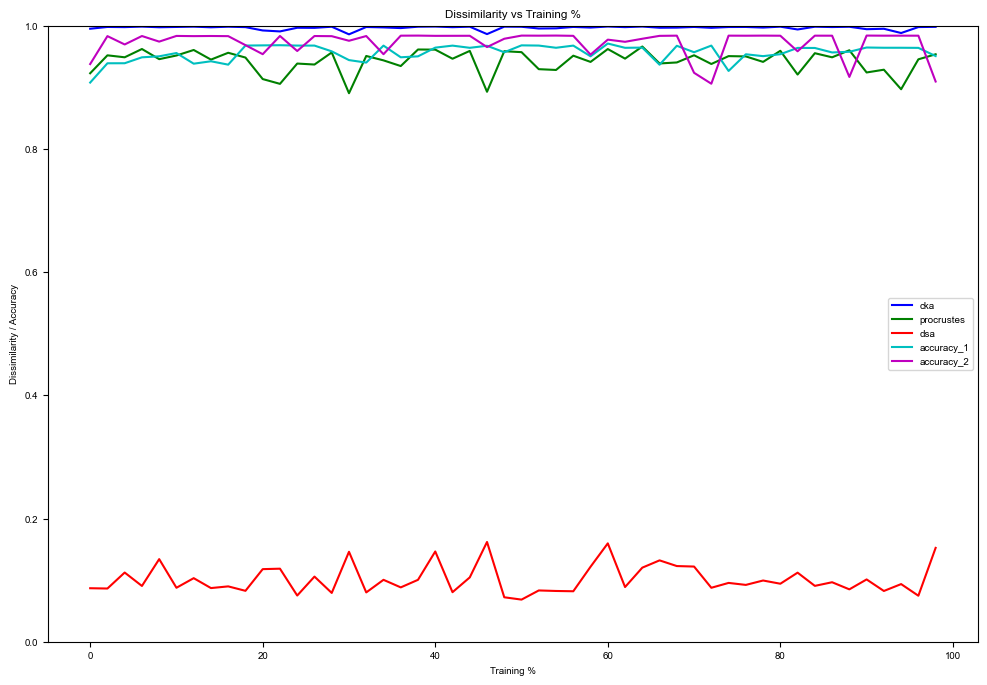

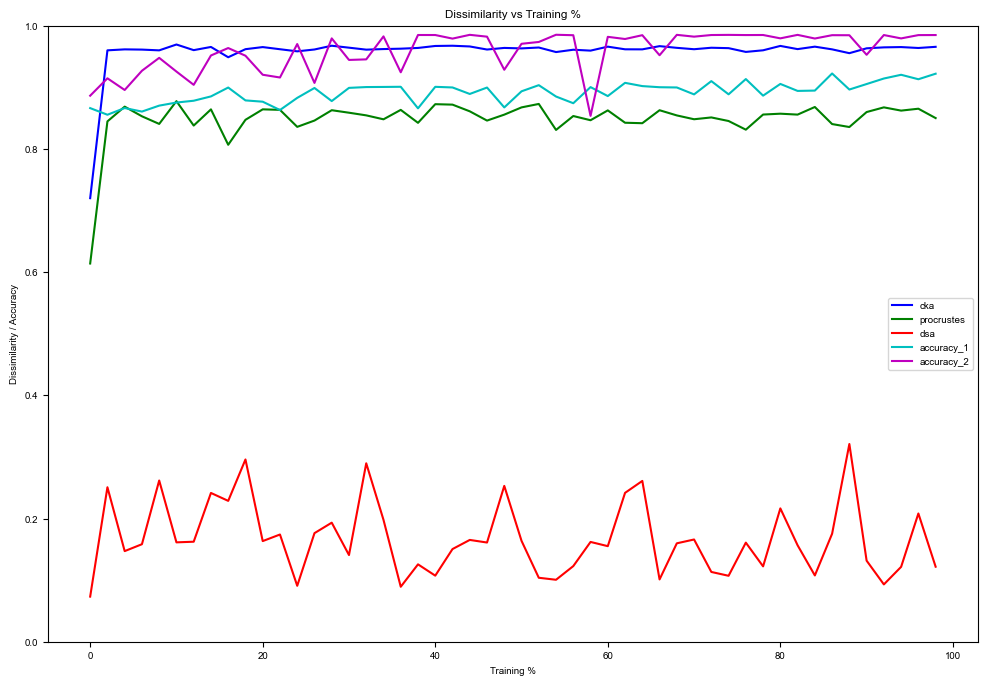

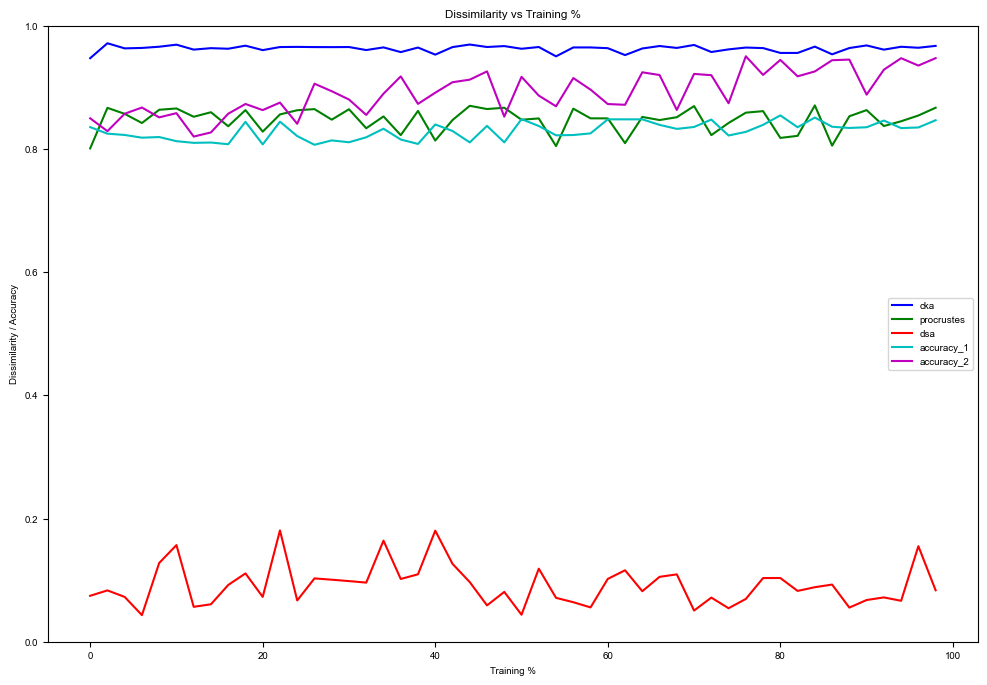

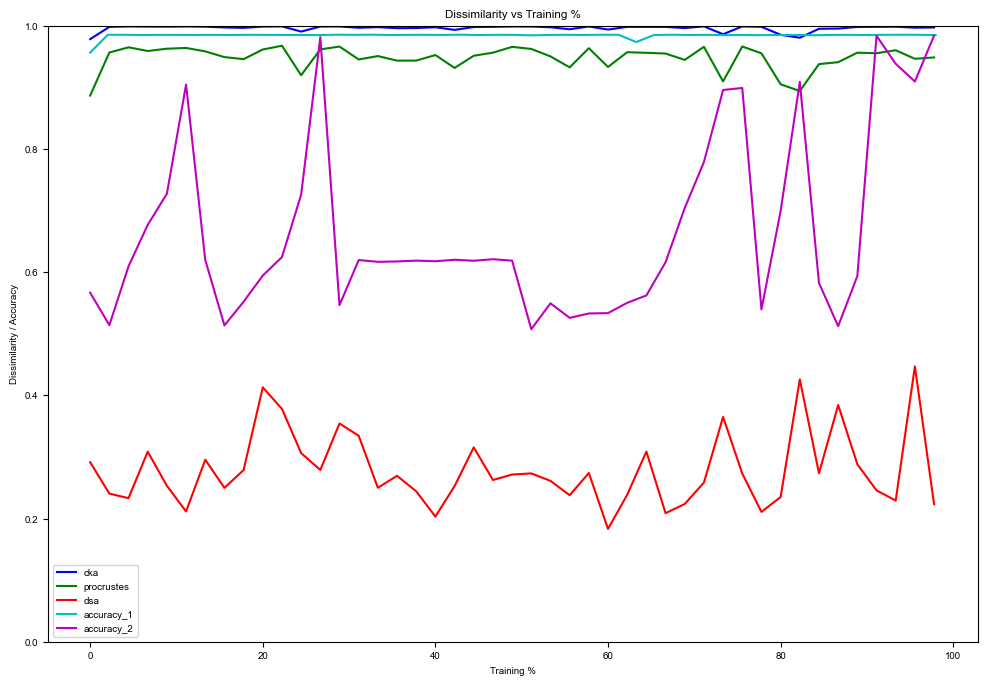

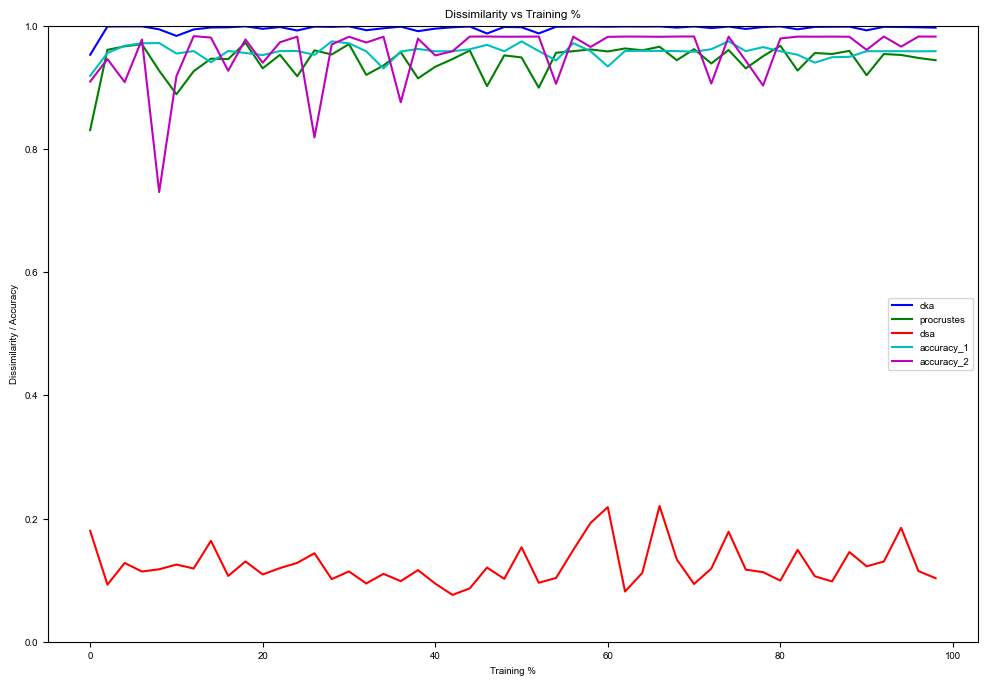

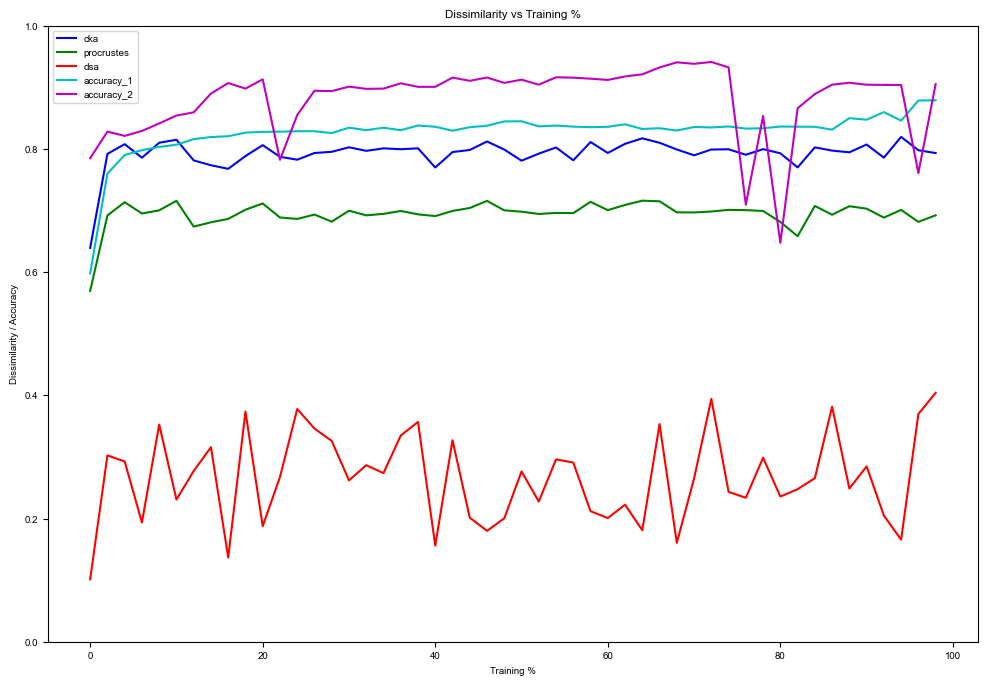

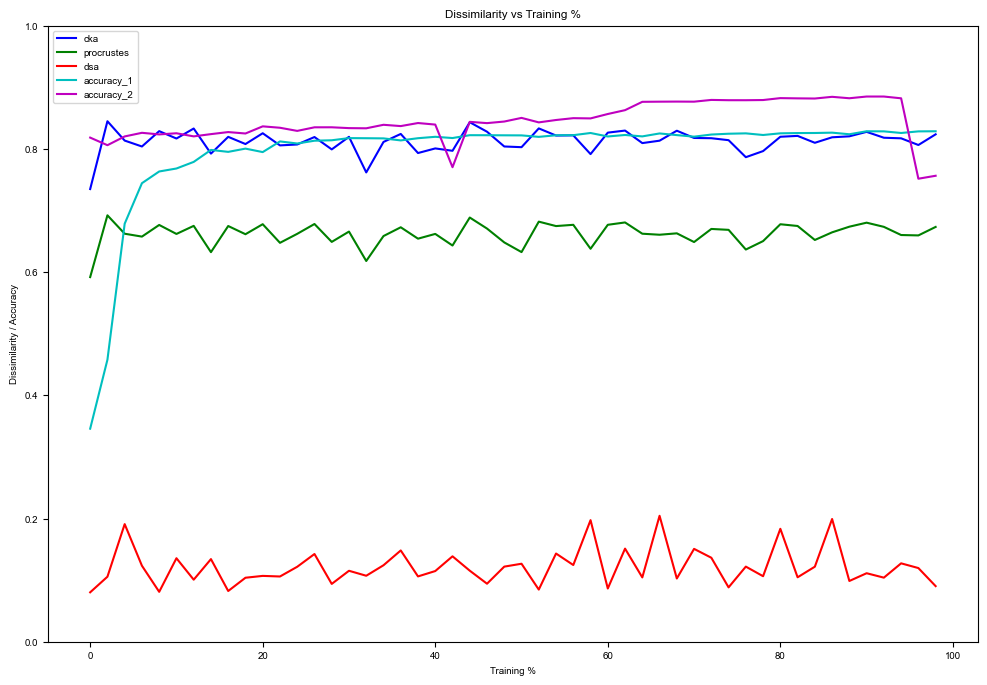

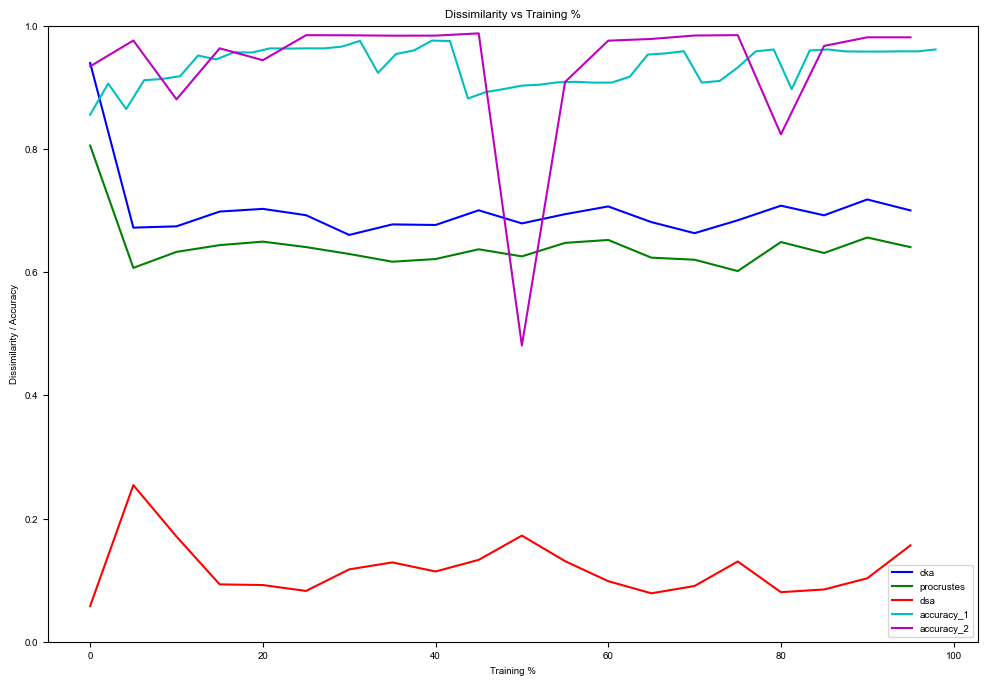

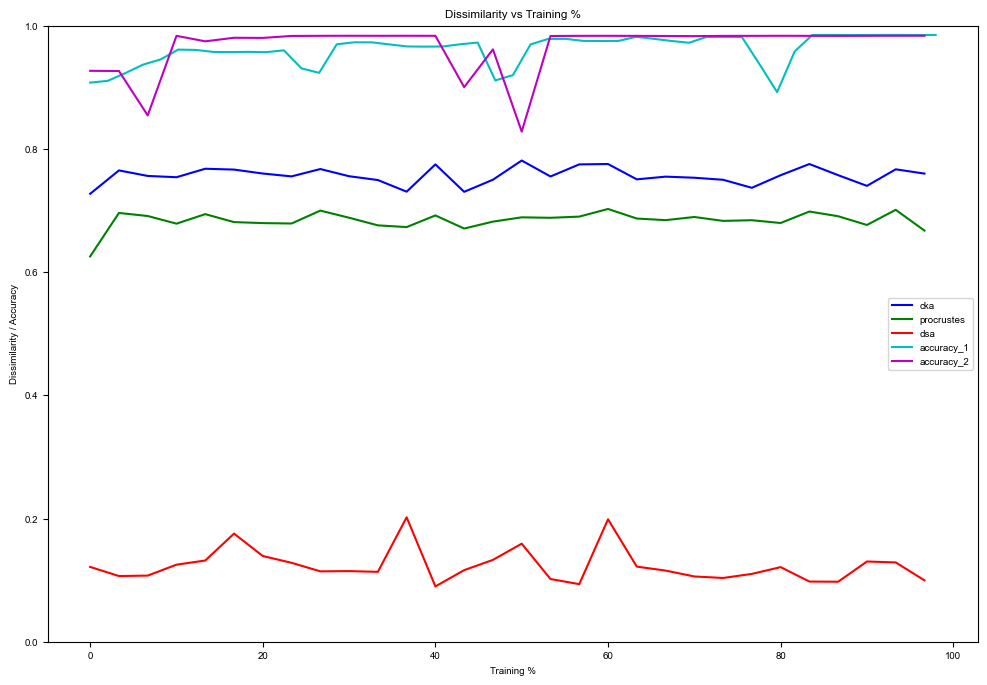

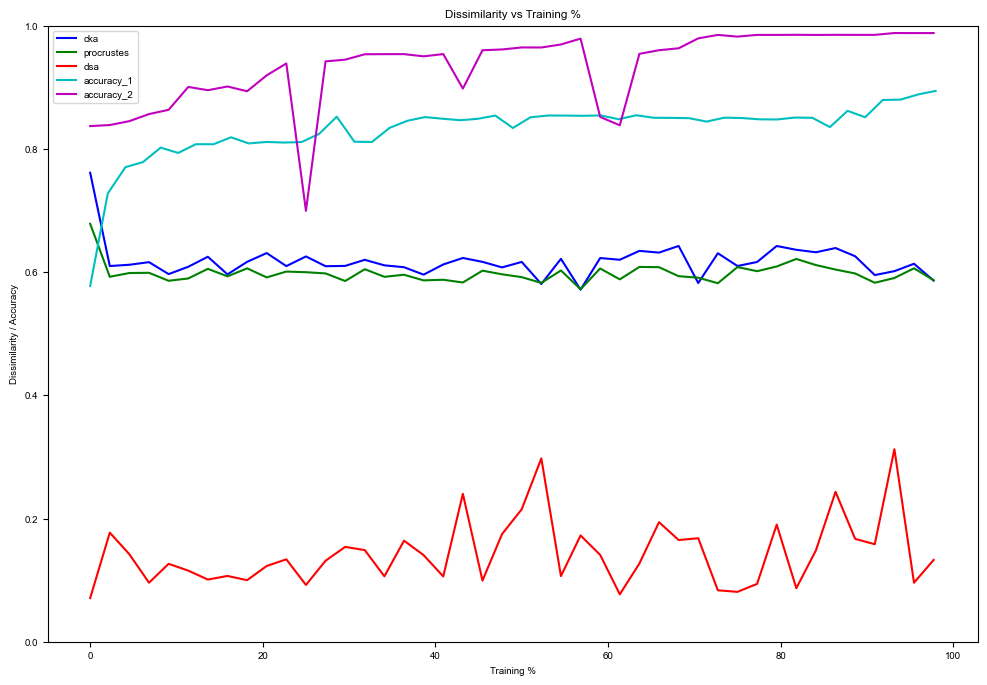

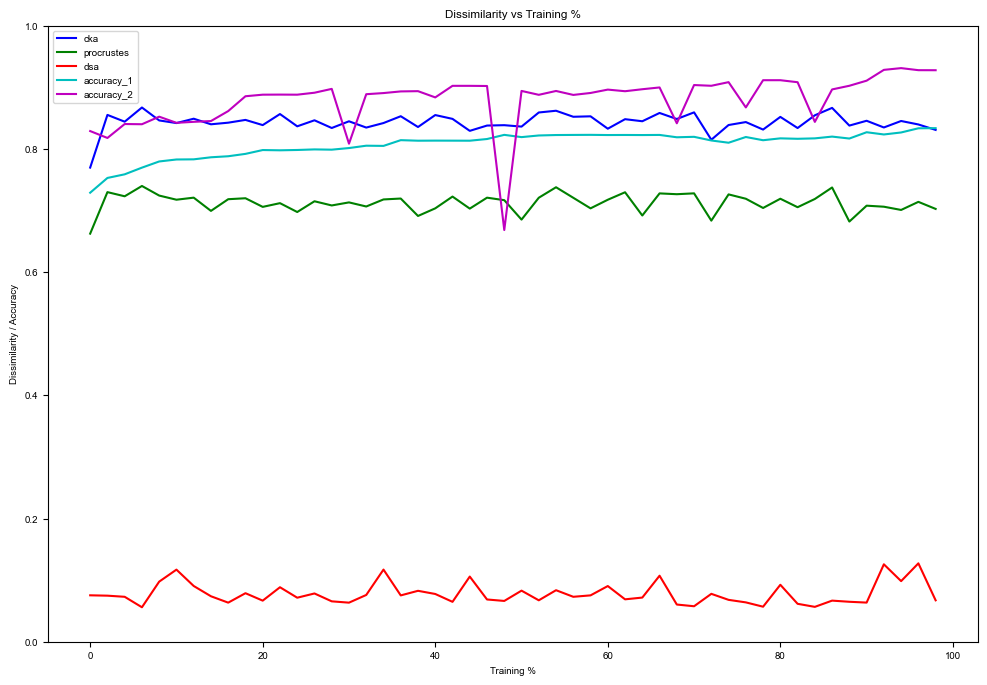

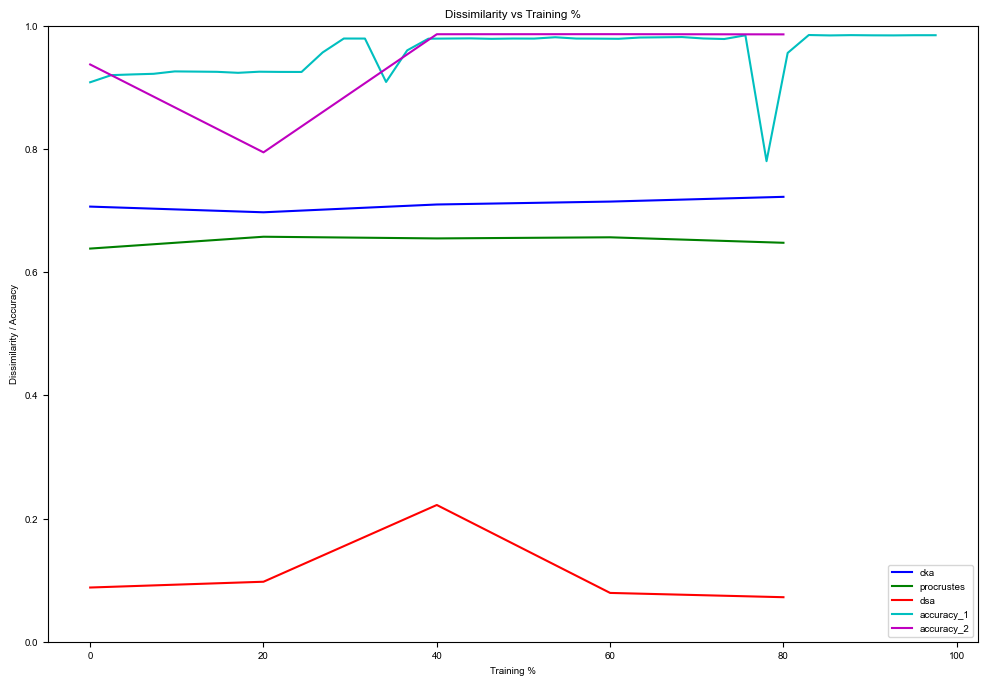

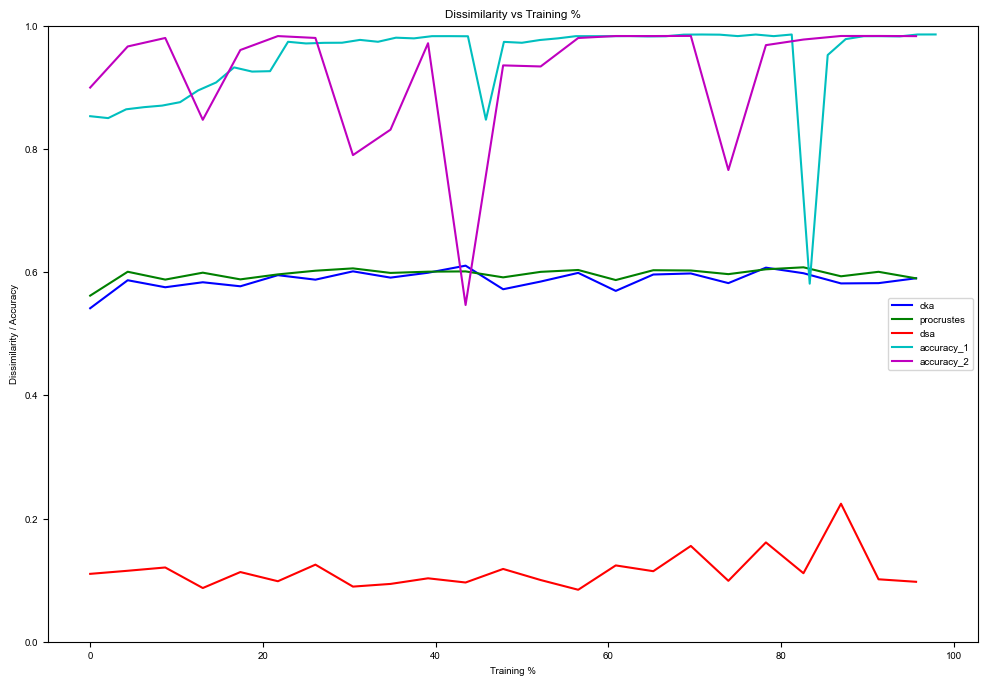

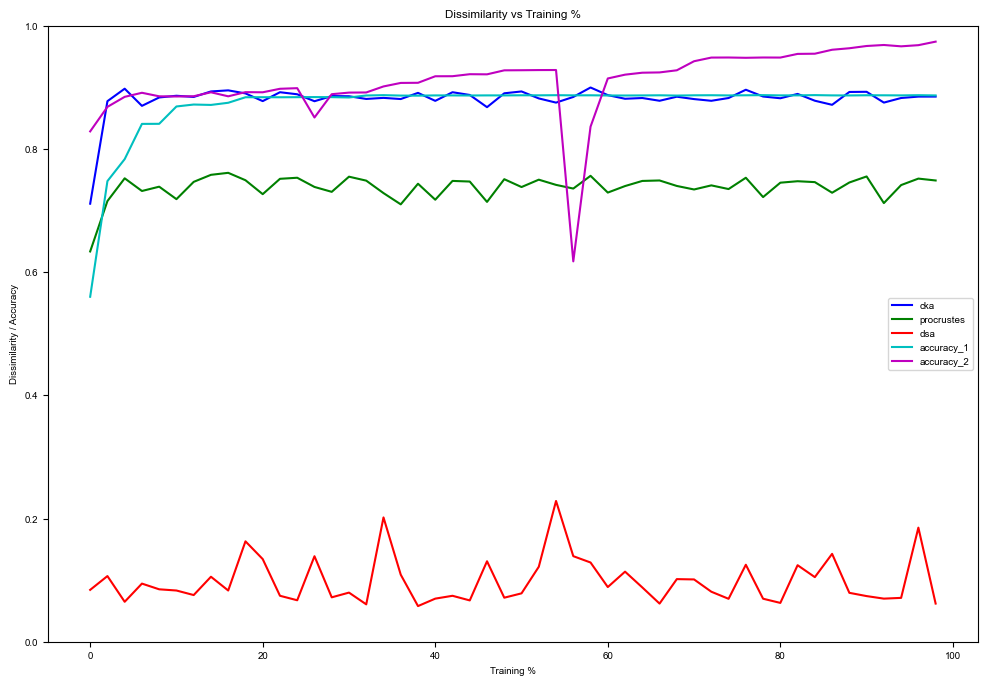

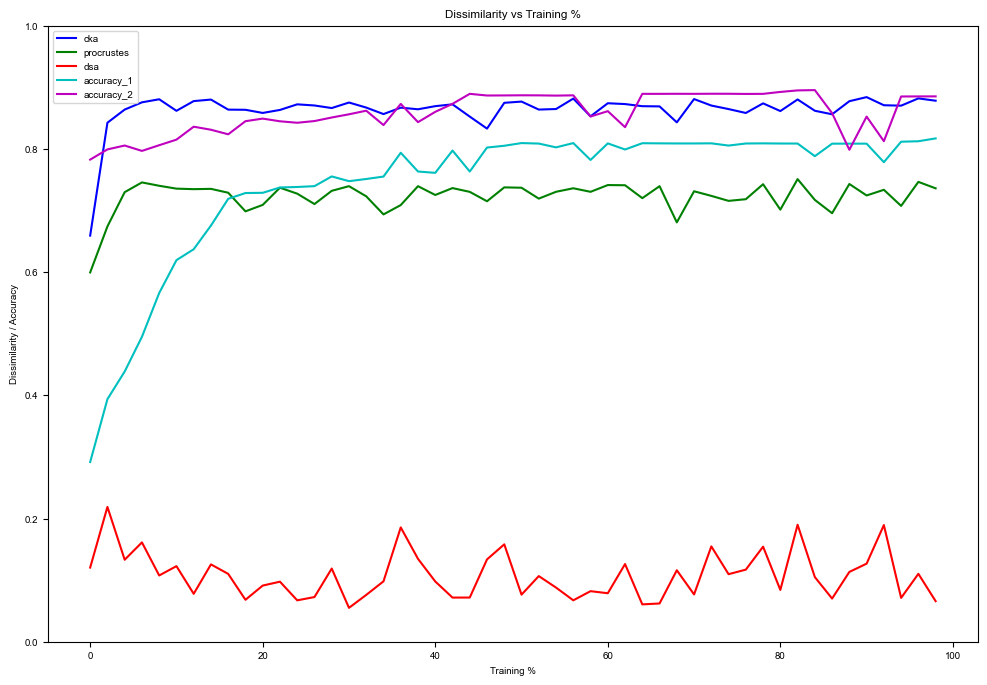

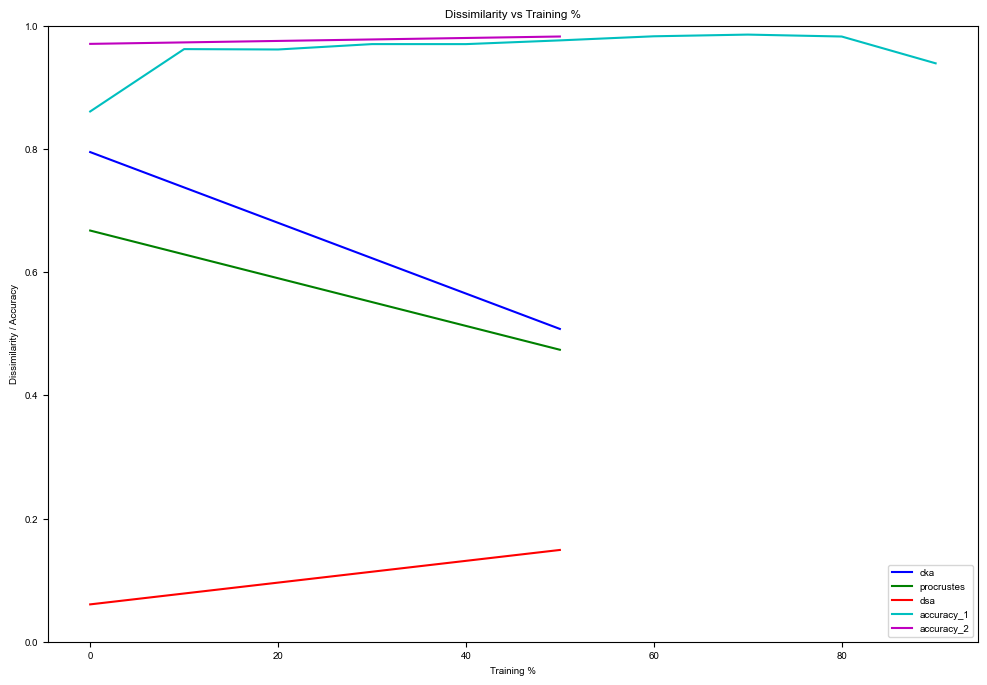

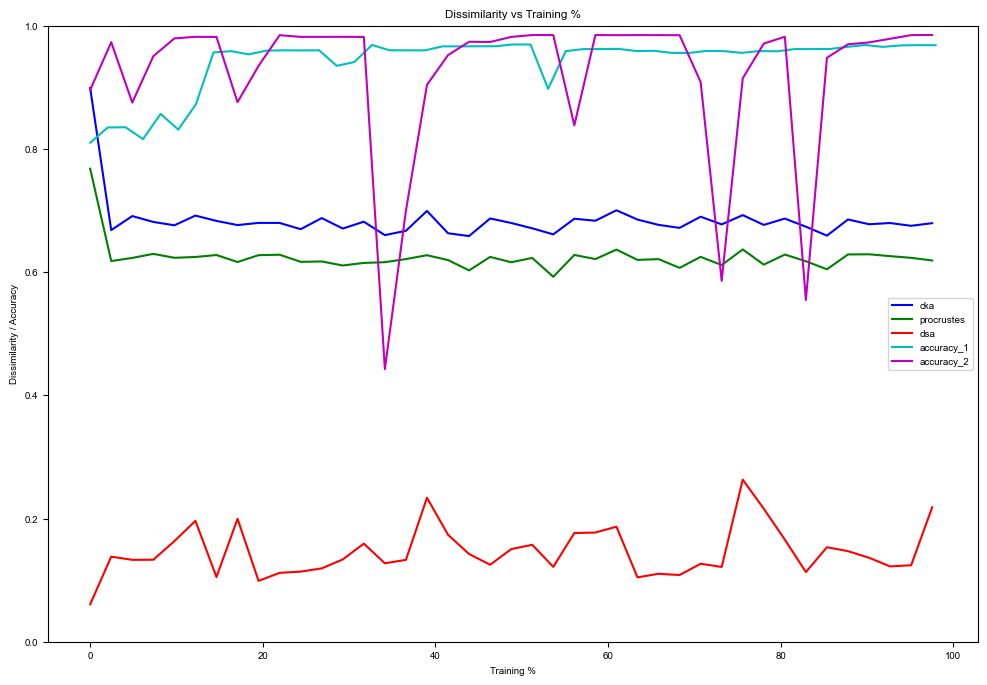

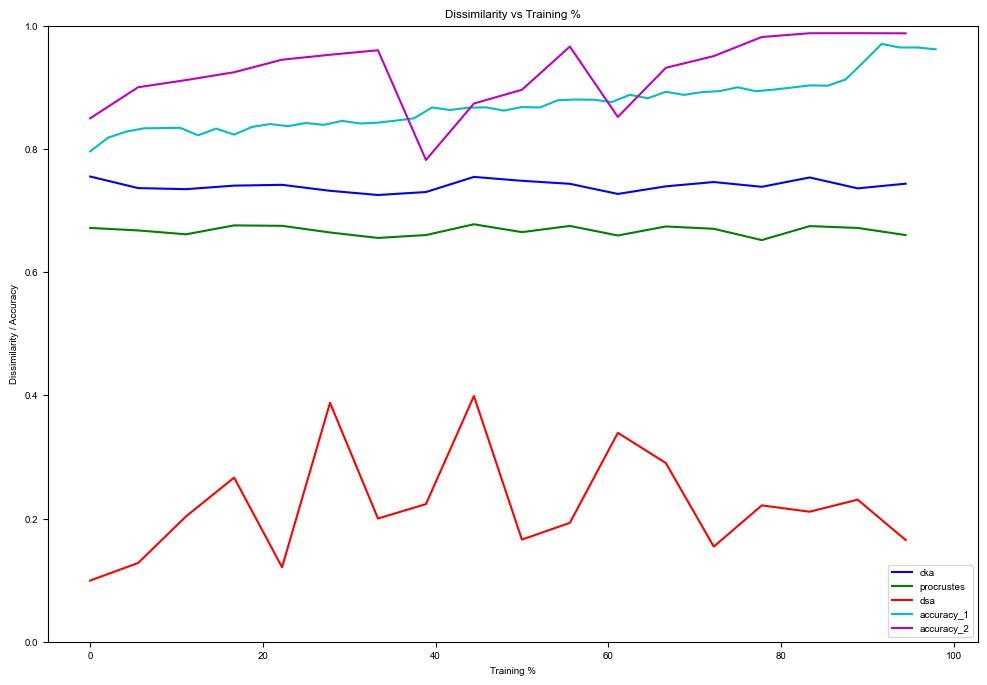

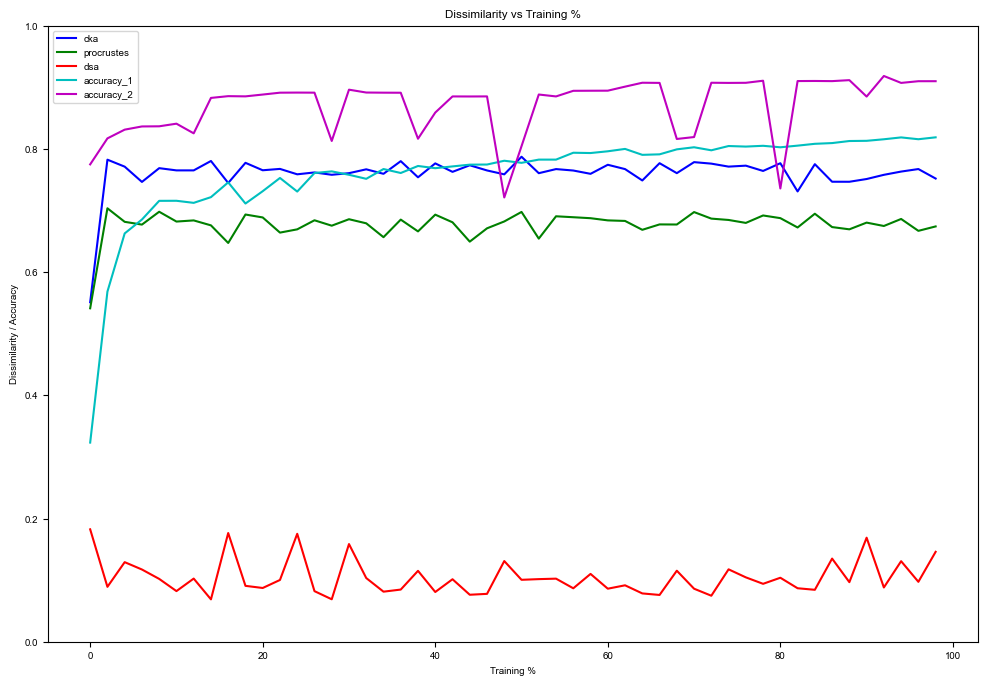

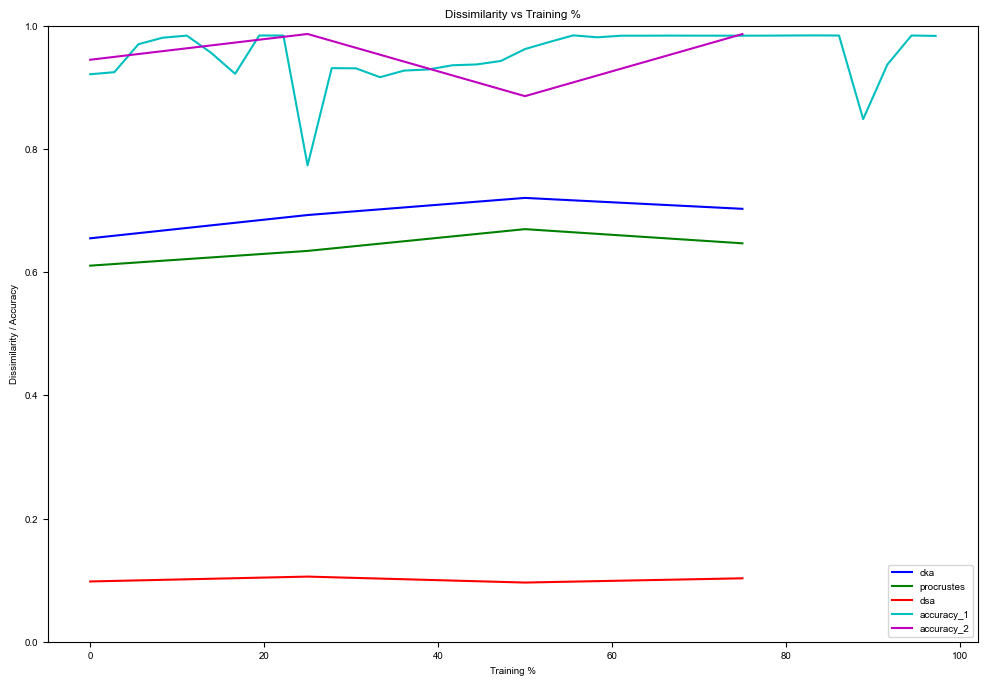

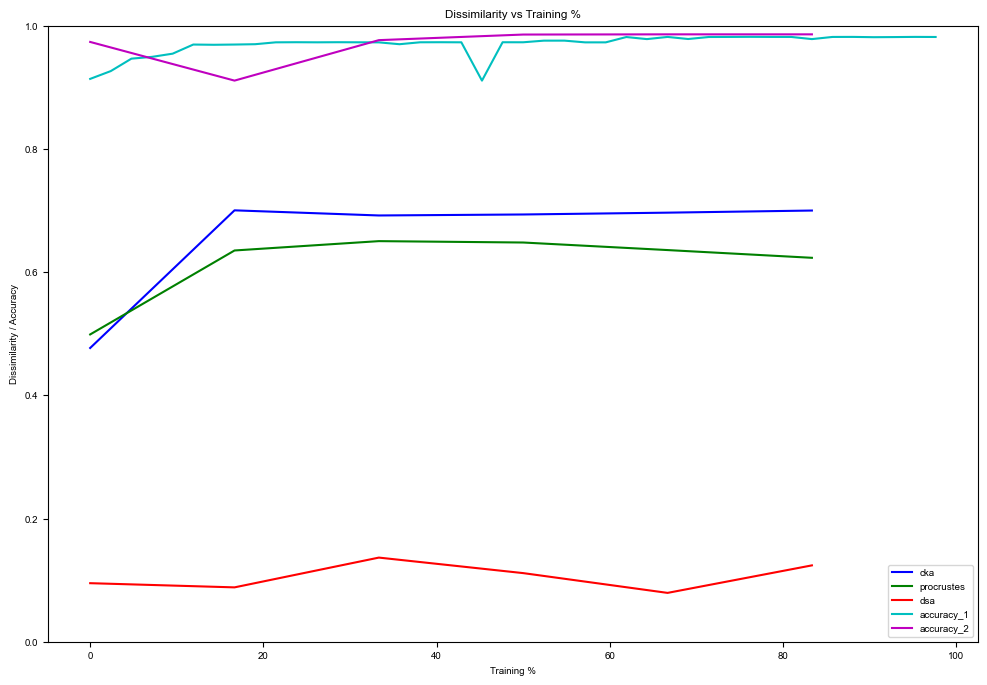

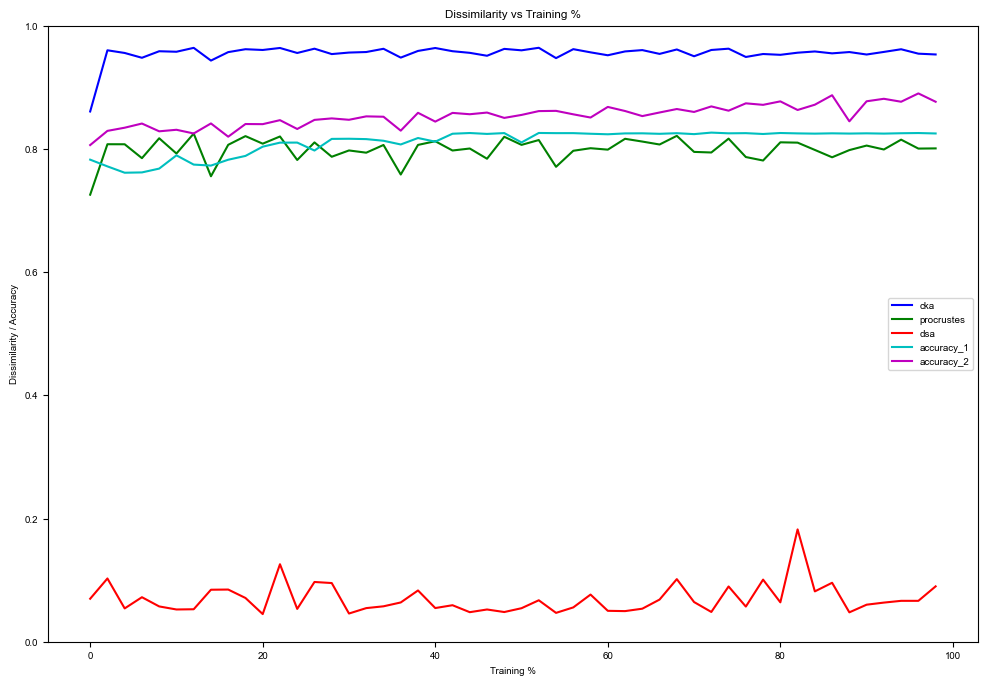

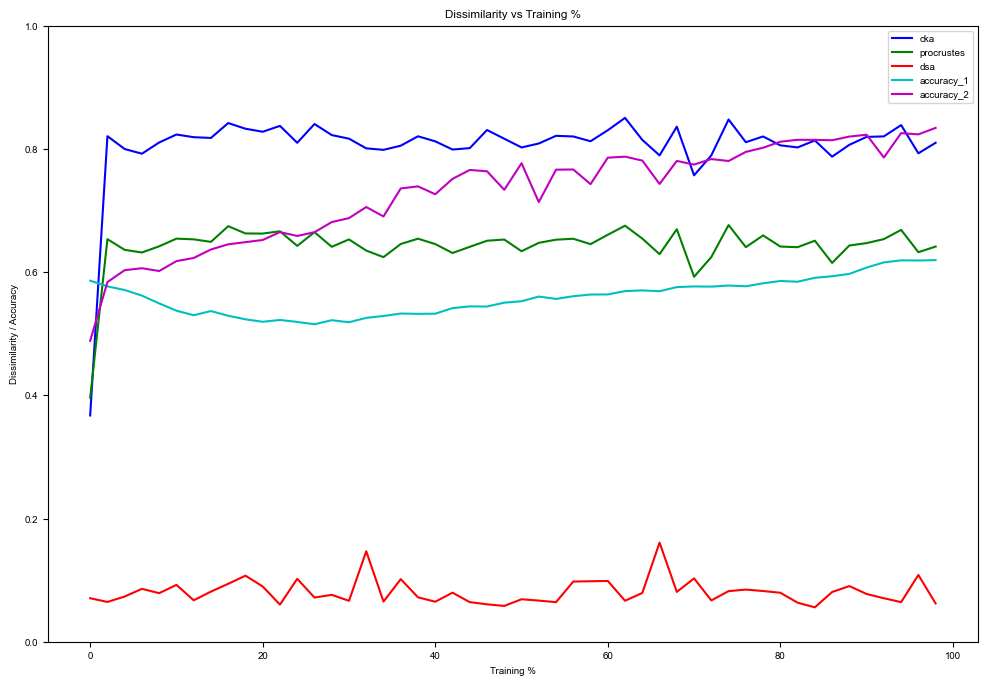

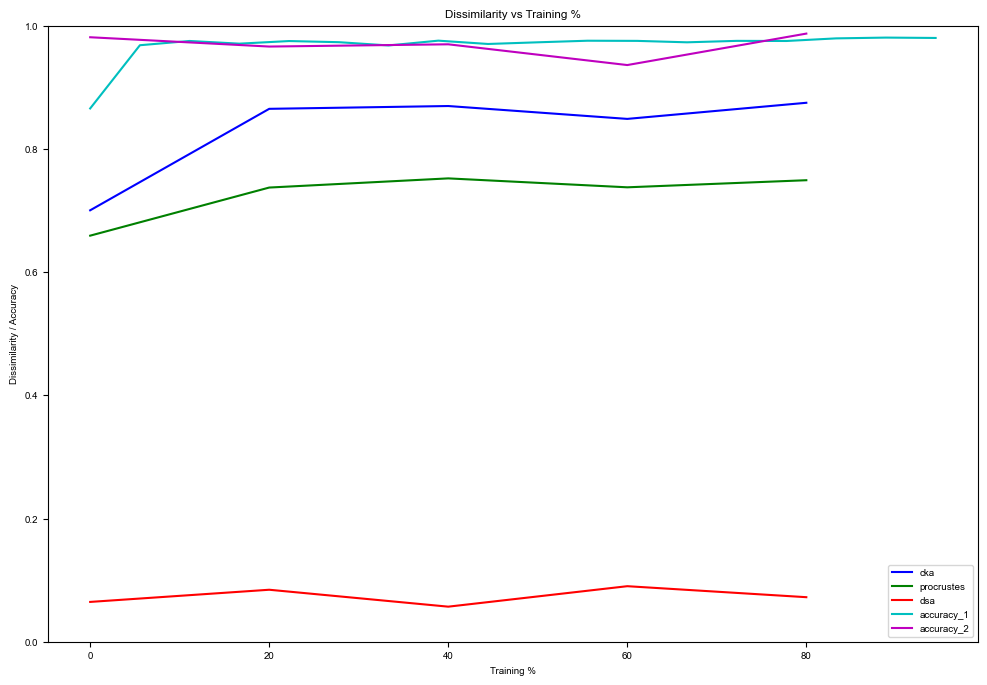

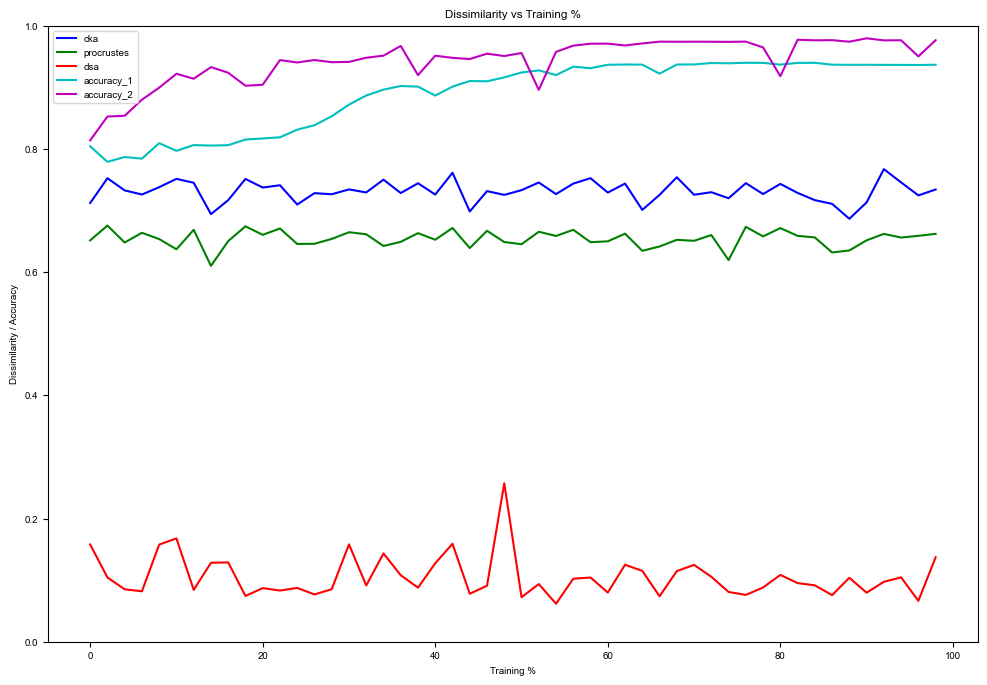

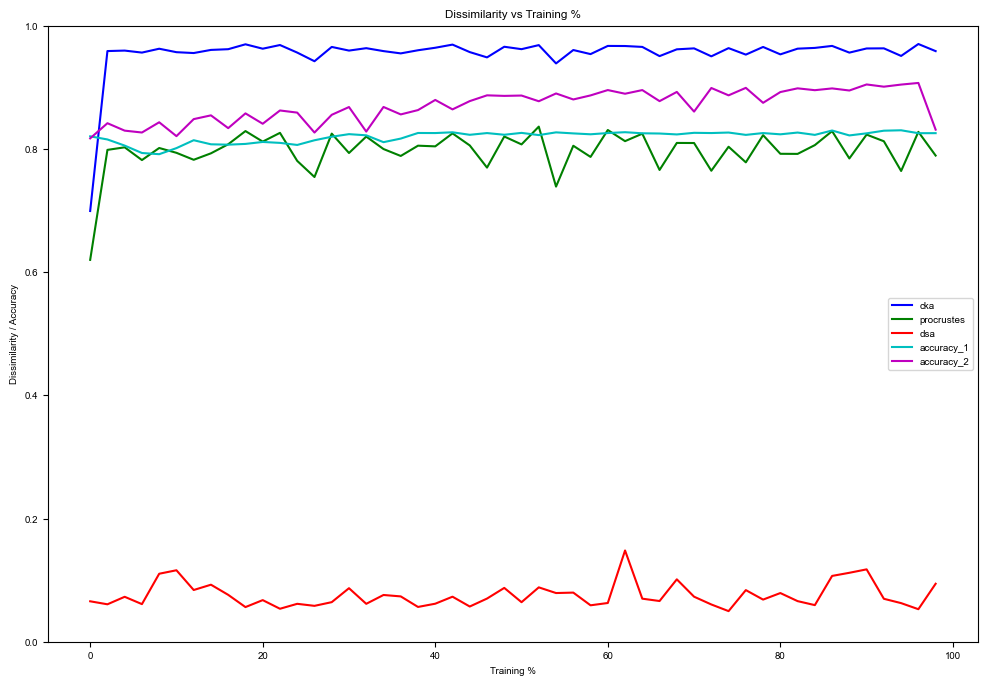

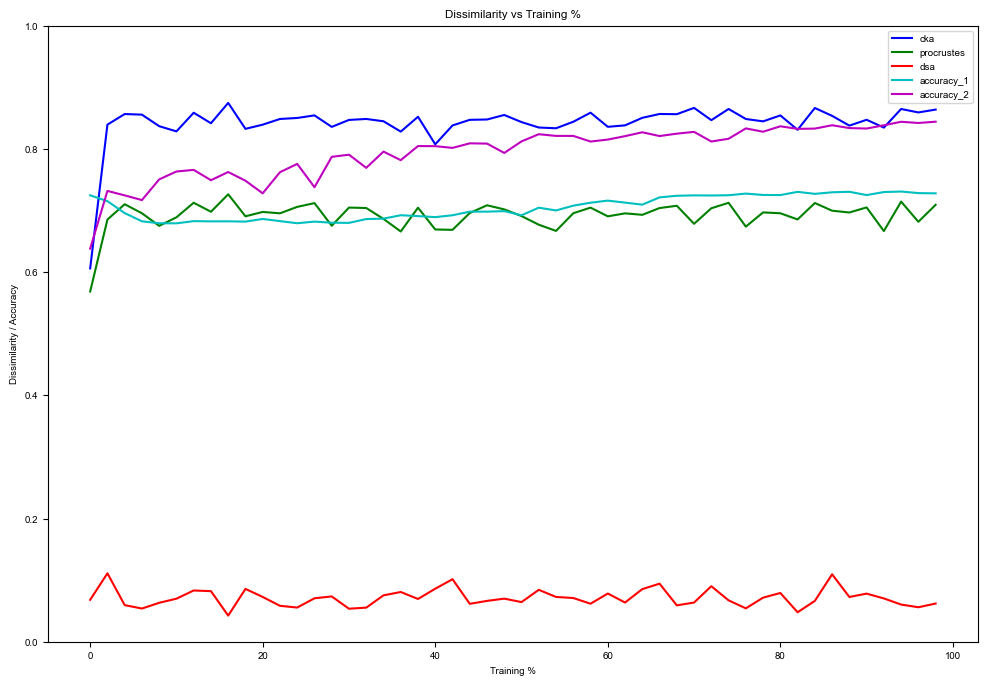

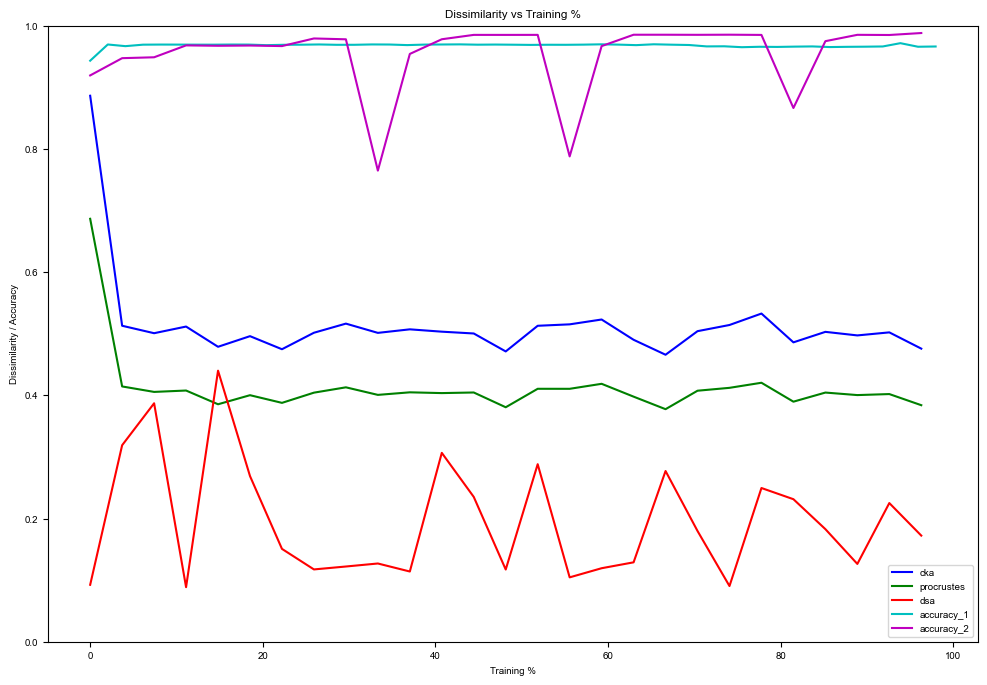

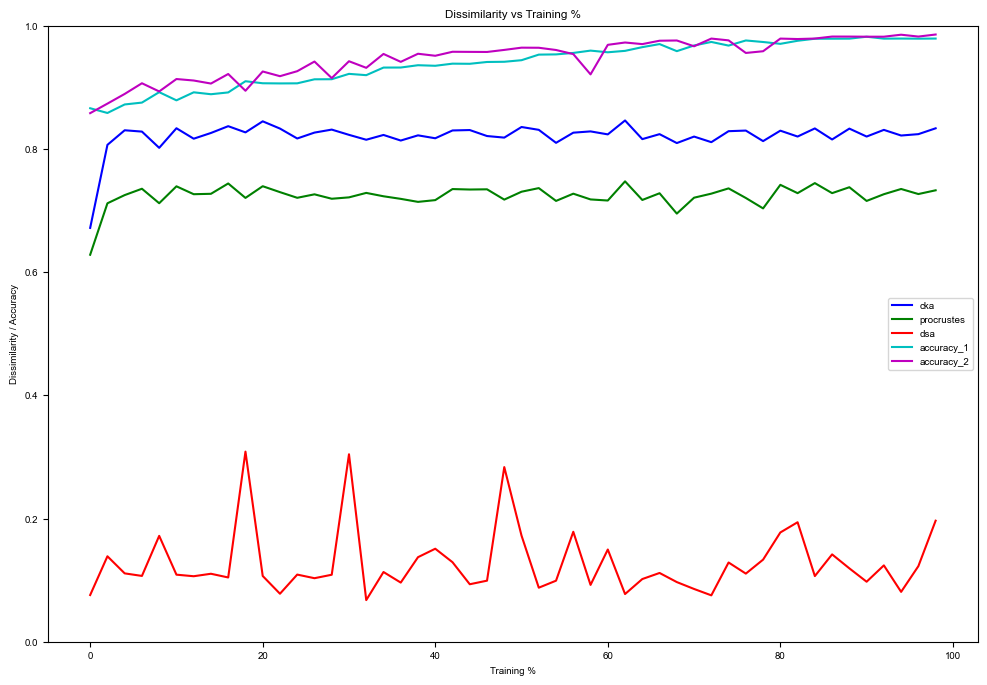

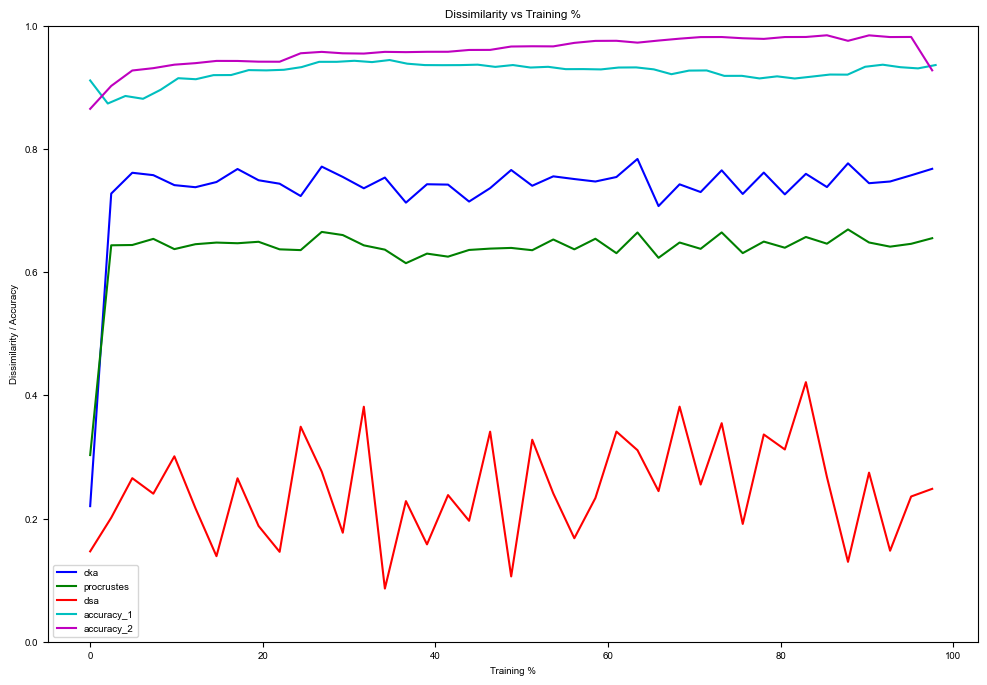

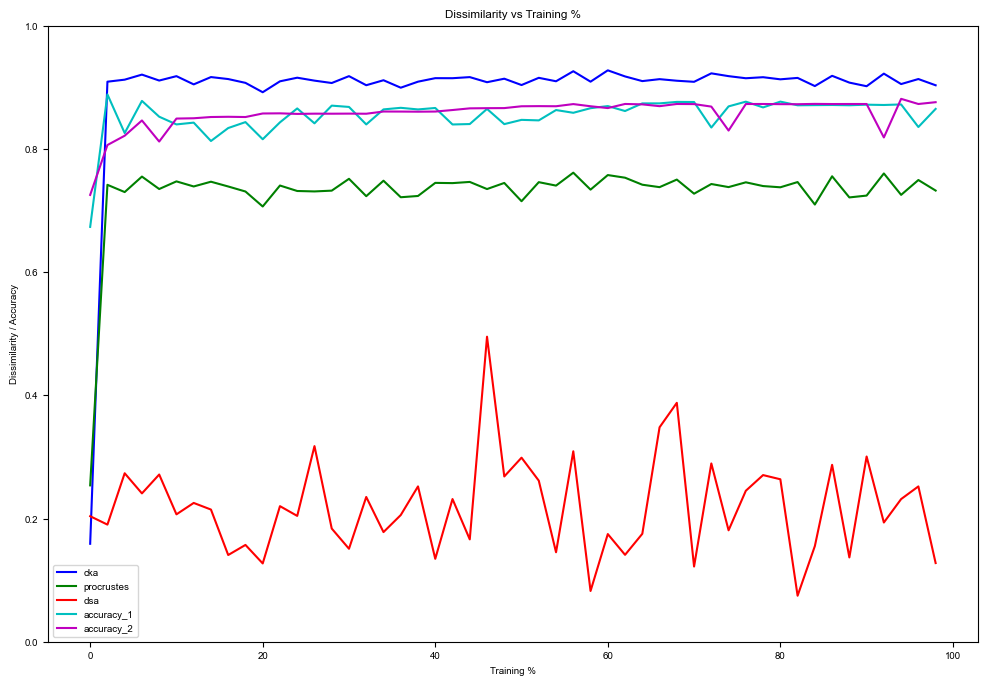

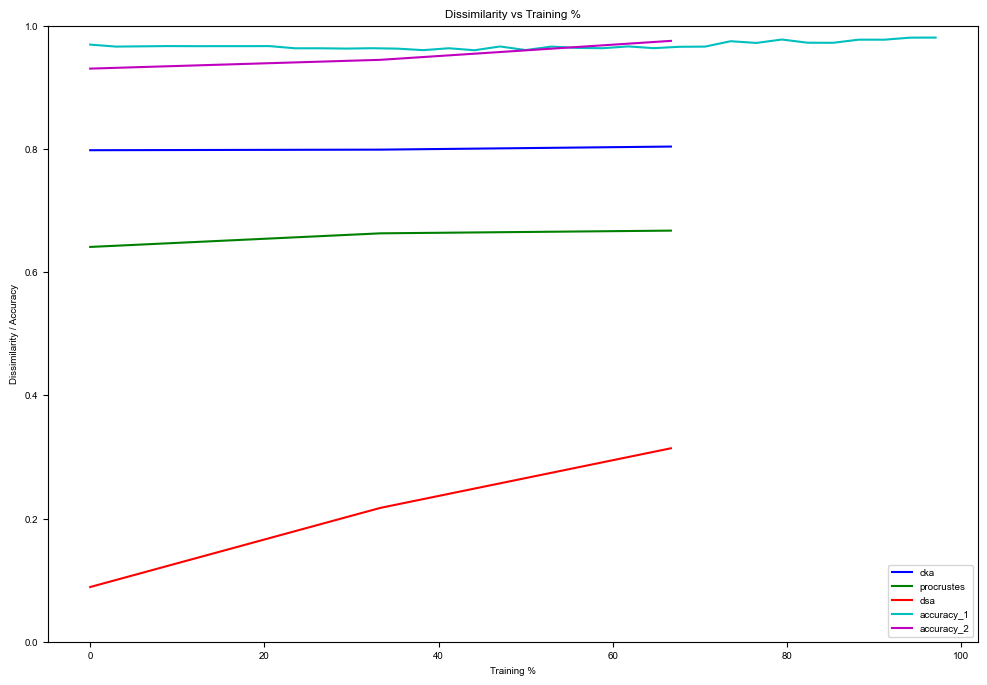

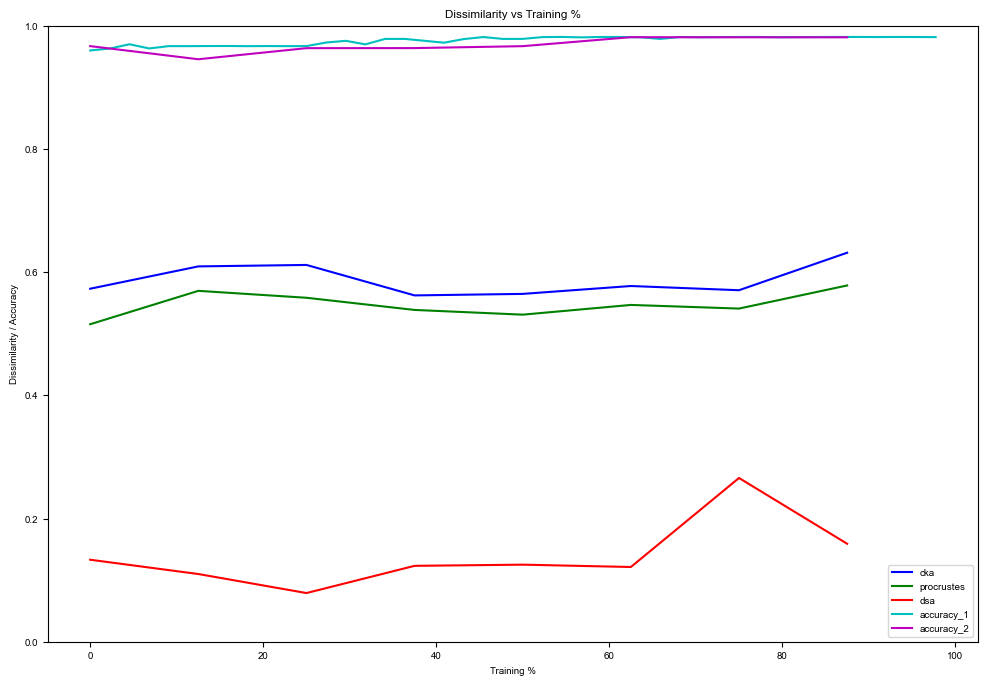

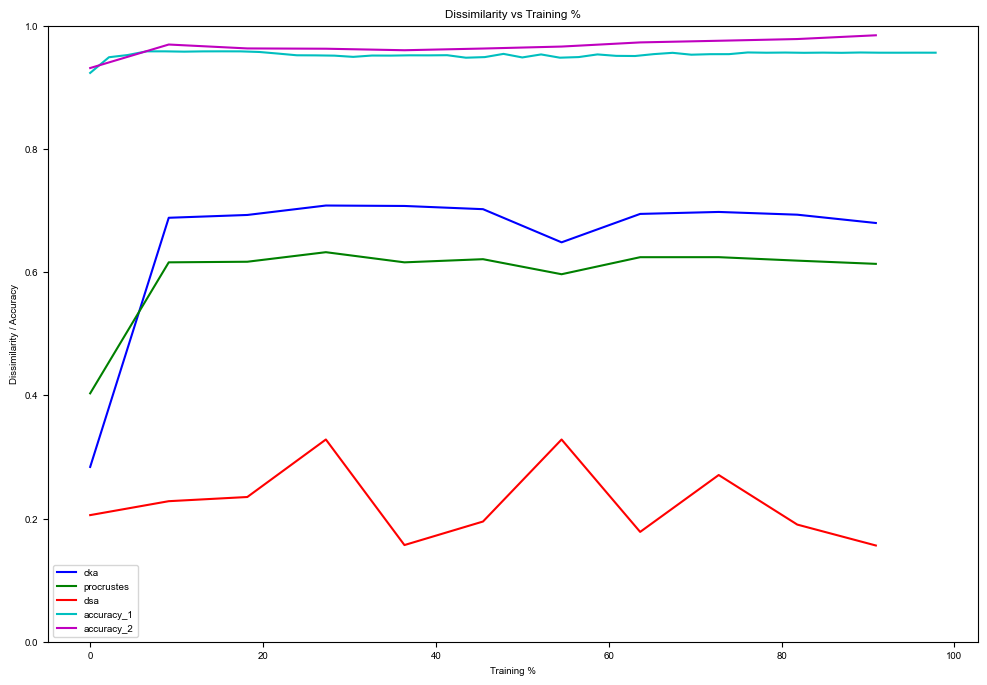

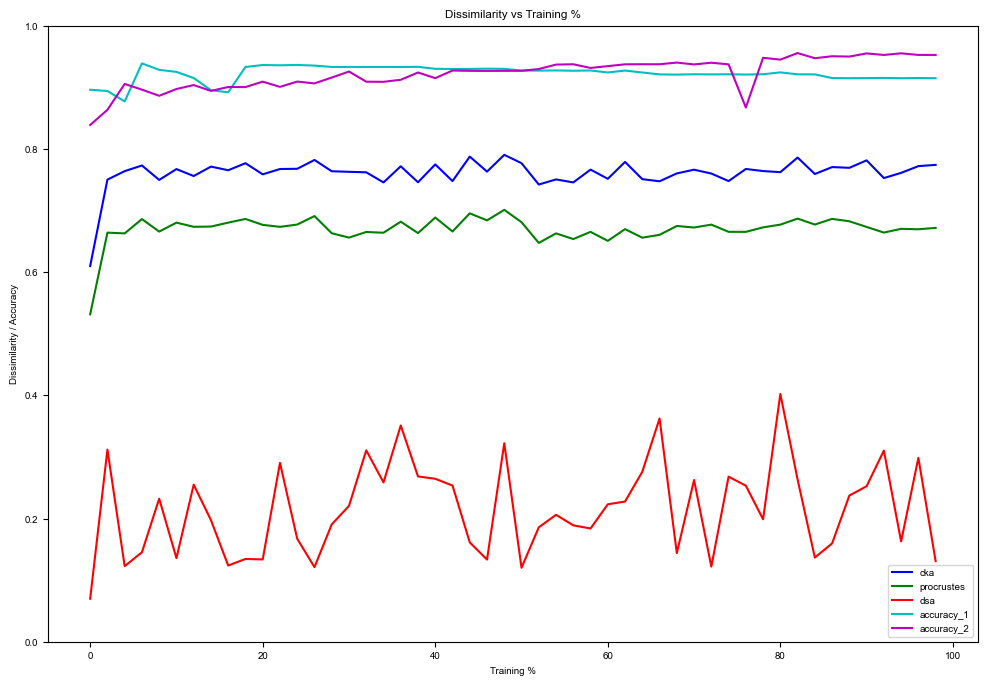

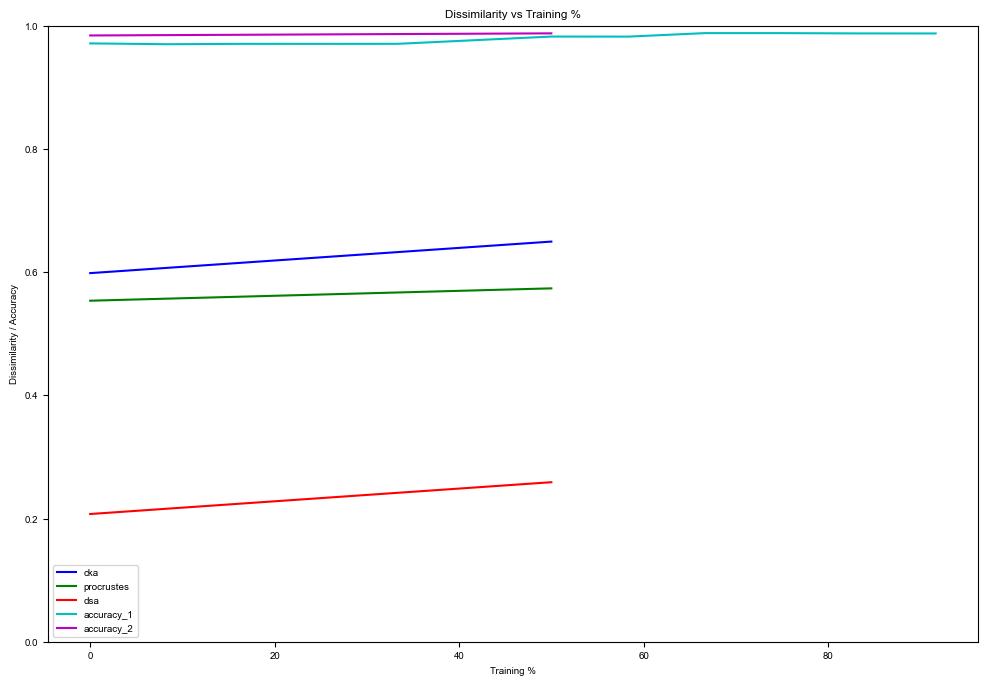

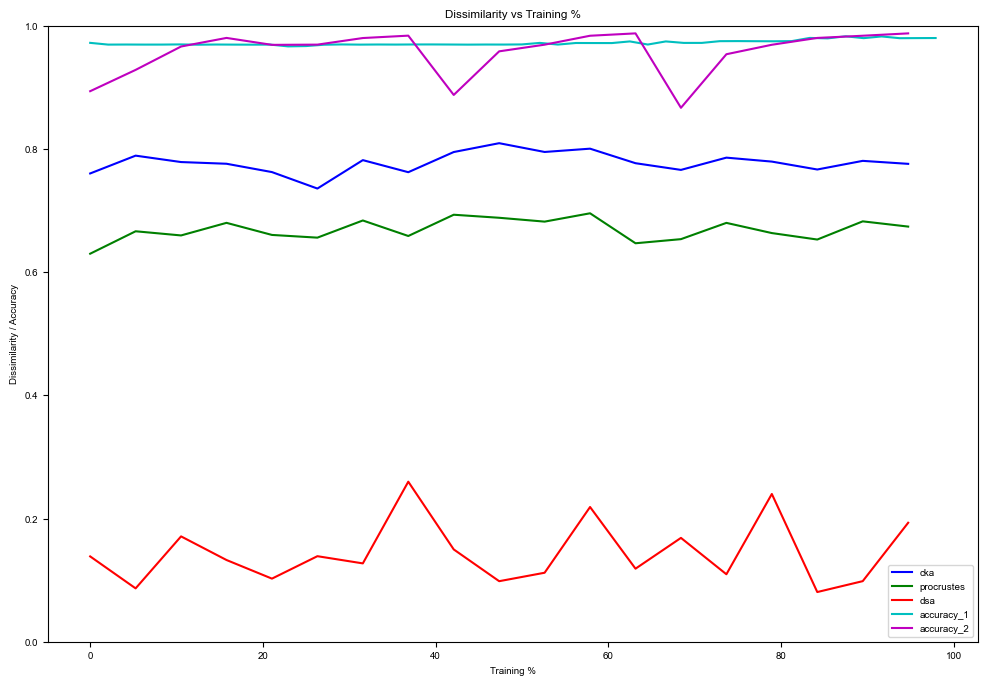

In [18]:
# Fix group1 and group2
group1_fixed = "pretrain_unfrozen"
group2_fixed = "pretrain_frozen_same_init"

df_filtered = df[(df['group1'] == group1_fixed) & (df['group2'] == group2_fixed)]

measures = ["cka", "procrustes", "dsa", "accuracy_1", "accuracy_2"]
colors = ["b", "g", "r", "c", "m"]  # Define colors for each measure

for index, row in df_filtered.iterrows():
    plt.figure(figsize=(12, 8))

    for measure, color in zip(measures, colors):
        values = row[measure]
        percentages = [(i / len(values)) * 100 for i in range(len(values))]
        plt.plot(percentages, values, label=f"{measure}", color=color)

    plt.title("Dissimilarity vs Training %")
    plt.xlabel("Training %")
    plt.ylabel("Dissimilarity / Accuracy")
    plt.ylim(0, 1)
    plt.legend(measures)
    plt.show()

In [19]:
# Fix group1 and group2
group1_fixed = "pretrain_unfrozen"
group2_fixed = "pretrain_frozen_same_init"
# Define the percentages
percentages = [i for i in range(0, 101, 20)]

df_group1_group2 = df[(df['group1'] == group1_fixed) & (df['group2'] == group2_fixed)]

In [20]:
# Filter out empty lists in 'dsa'
filtered_dsa = df_group1_group2['dsa'].apply(lambda x: len(x) if x else None).dropna()

# Calculate statistics
filtered_dsa.describe()

count    63.000000
mean     34.968254
std      19.785110
min       1.000000
25%      17.500000
50%      50.000000
75%      50.000000
max      50.000000
Name: dsa, dtype: float64

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/var/folders/rg/xgkyjs4945d6ckms1nn6v0jm0000gn/T/ipykernel_1790/4127058598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_group2[measure + '_interpolated'] = df_group1_group2[measure].apply(lambda x: interpolate_and_sample(x, percentages))
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None

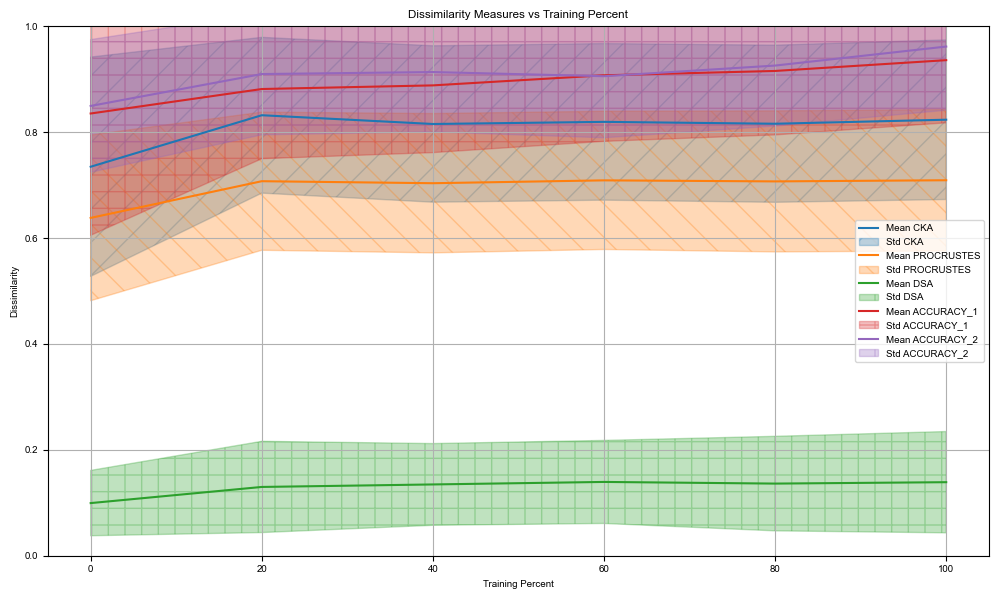

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to interpolate and sample at fixed percentages
def interpolate_and_sample(measures_list, percentages):
    if not measures_list:
        return [np.nan] * len(percentages)
    
    original_percentages = np.linspace(0, 100, len(measures_list))
    interpolation_function = interp1d(original_percentages, measures_list, kind='linear', fill_value="extrapolate")
    return interpolation_function(percentages)

# Apply interpolation and sampling to each row
for measure in ['cka', 'procrustes', 'dsa','accuracy_1','accuracy_2']:
    df_group1_group2[measure + '_interpolated'] = df_group1_group2[measure].apply(lambda x: interpolate_and_sample(x, percentages))

# Calculate the mean and standard deviation for each measure
summary_stats = {}
for measure in ['cka', 'procrustes', 'dsa','accuracy_1','accuracy_2']:
    interpolated_values = np.array(df_group1_group2[measure + '_interpolated'].tolist())
    summary_stats[measure] = {
        'median': np.nanmedian(interpolated_values, axis=0),
        'std': np.nanstd(interpolated_values, axis=0)
    }

# Plotting
plt.figure(figsize=(10, 6))

# Plot each measure with different colors and hatching patterns for uncertainty
for i, measure in enumerate(['cka', 'procrustes', 'dsa','accuracy_1','accuracy_2']):
    median = summary_stats[measure]['median']
    std = summary_stats[measure]['std']
    color = f"C{i}"  # Cycle through different colors
    hatch = "/" if i == 0 else "\\" if i == 1 else "+"  # Different hatching patterns
    
    plt.plot(percentages, median, color=color, label=f"Mean {measure.upper()}")
    plt.fill_between(percentages, median - std, median + std, color=color, alpha=0.3, hatch=hatch, label=f"Std {measure.upper()}")

plt.title('Dissimilarity Measures vs Training Percent')
plt.xlabel('Training Percent')
plt.ylabel('Dissimilarity')
plt.ylim(0, 1)  # Set y-axis range between 0 and 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
